In [8]:
import json 
import numpy as np 
import os
import glob 
import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.ticker import MaxNLocator, LogLocator, ScalarFormatter 
import matplotlib.ticker as ticker  
from matplotlib.lines import Line2D
from matplotlib.legend_handler import HandlerBase
 

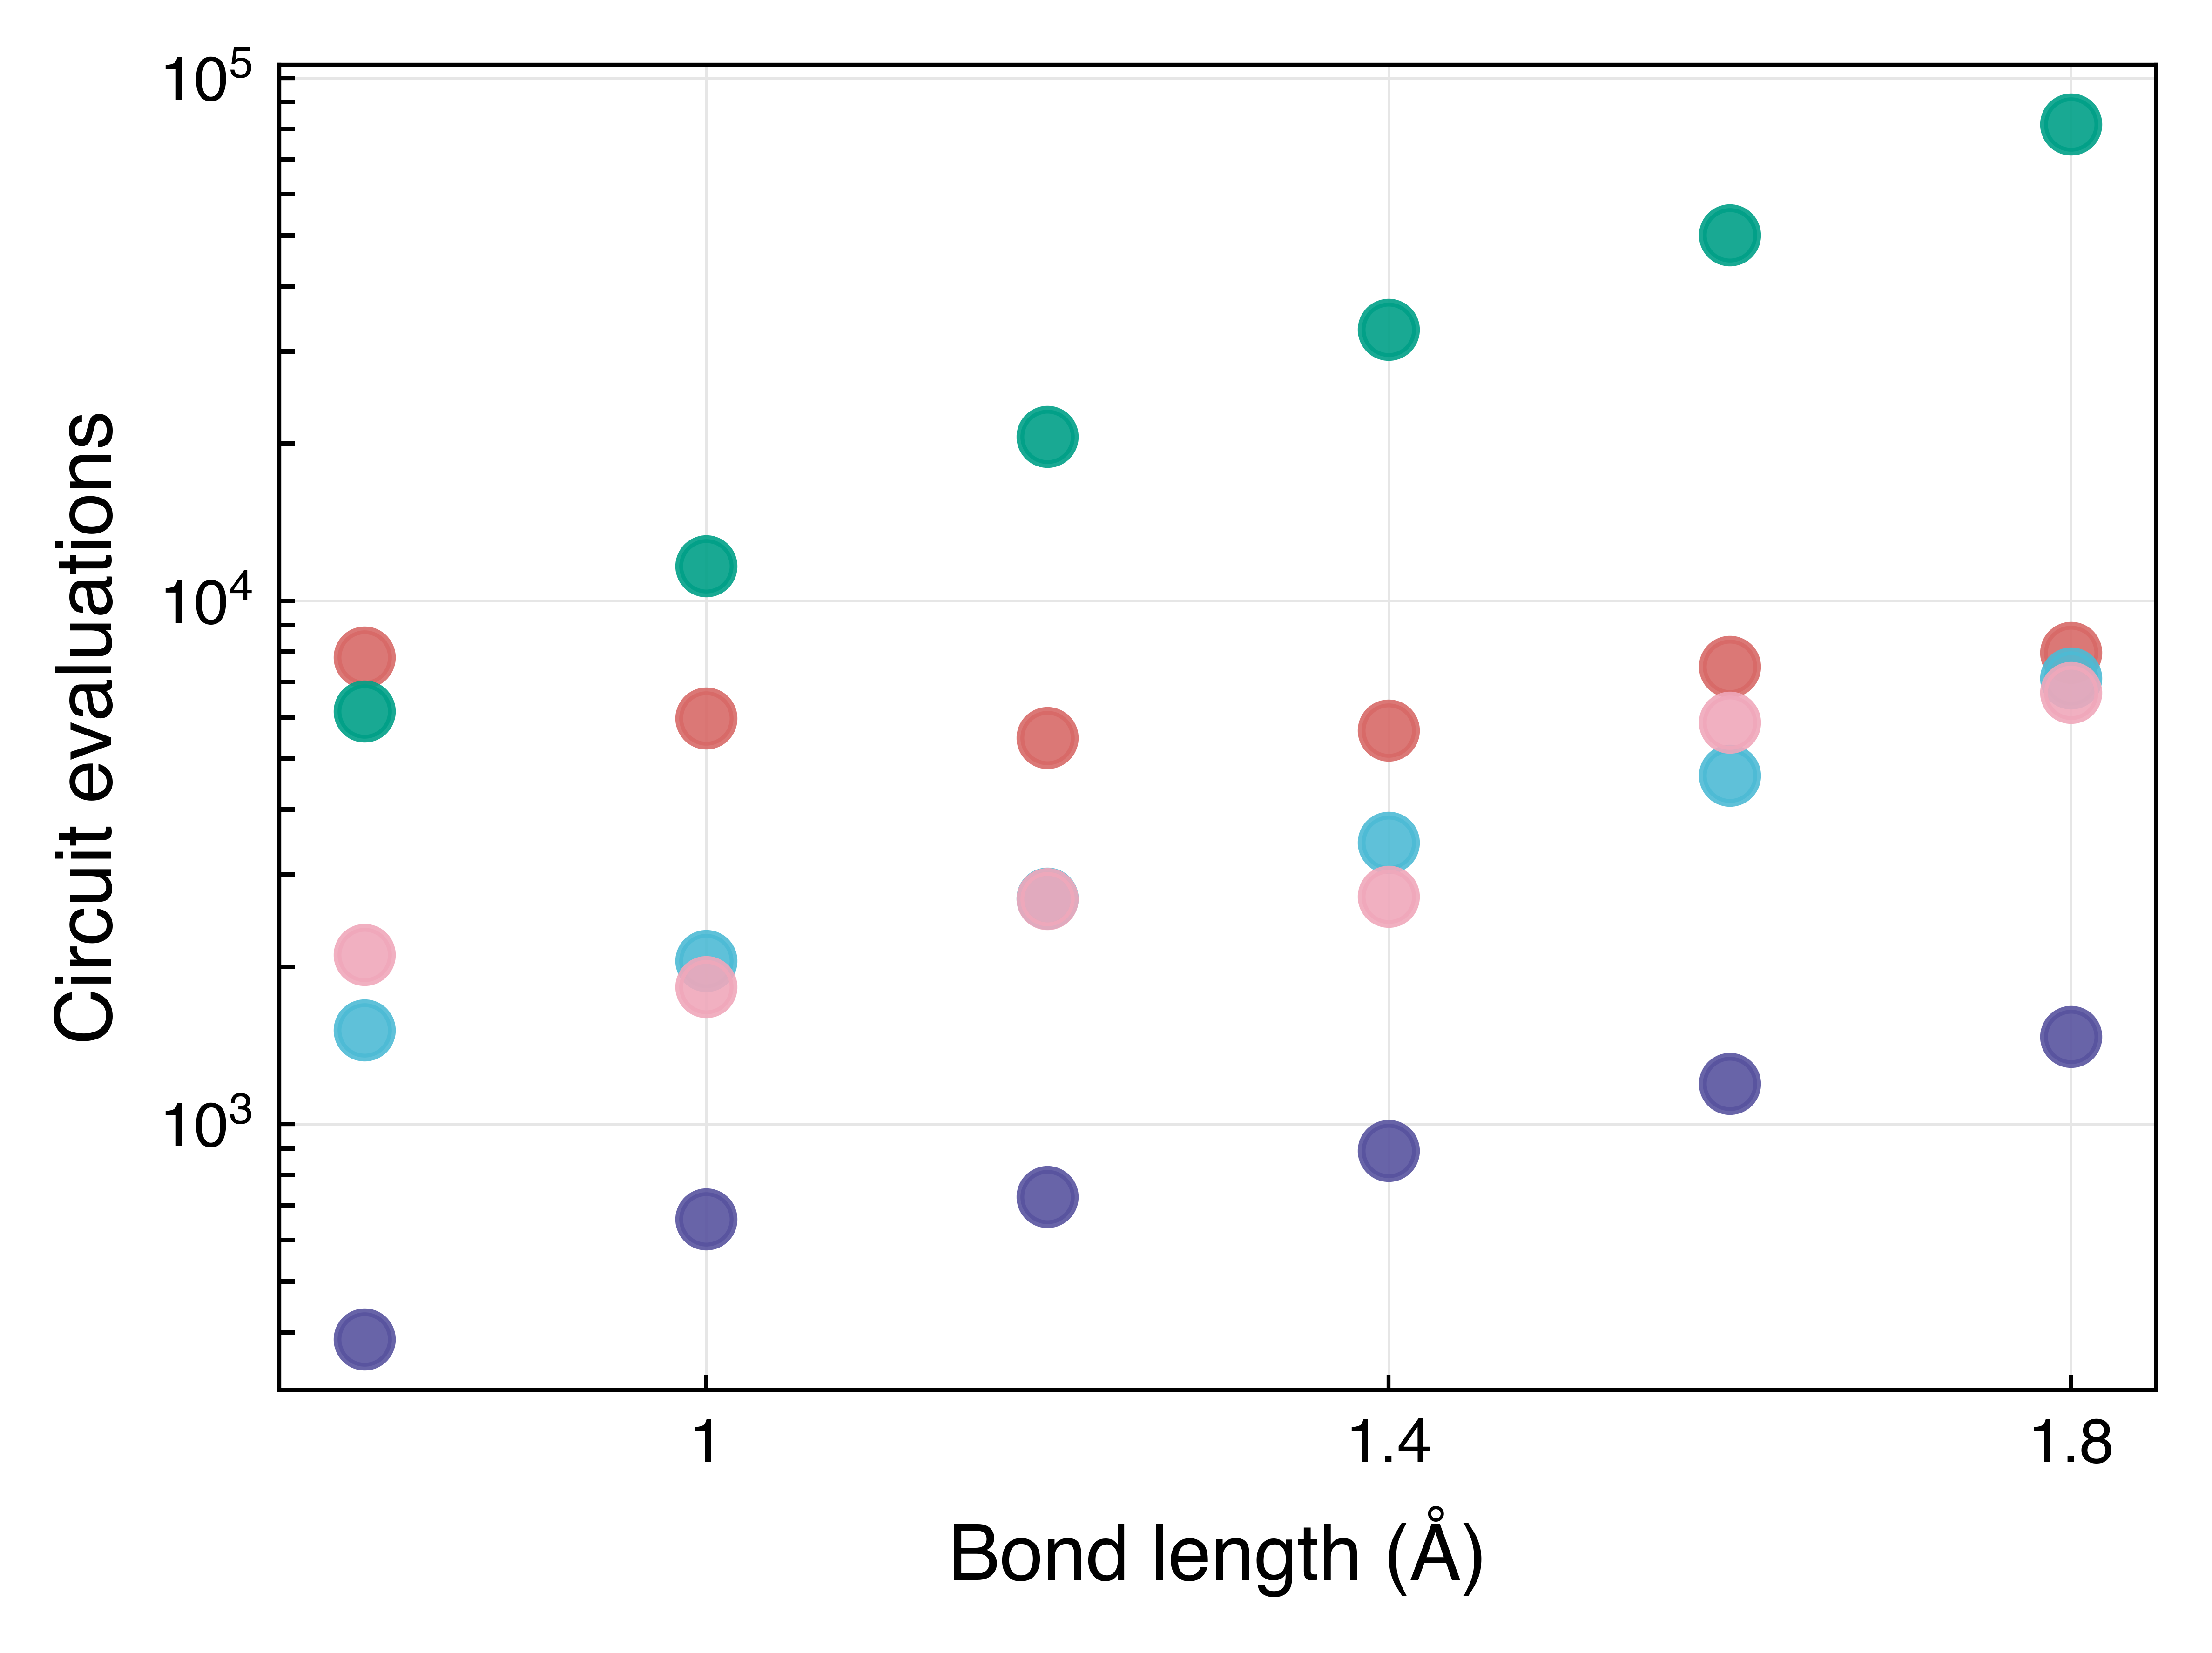

In [9]:
nature_colors = ['#d86967', '#00A087', '#4DBBD5', '#58539f', '#f0a8bb', '#3C5488', '#bbbbd6']

plt.rcParams.update({
    'font.family': 'Helvetica',
    'font.size': 8,
    'axes.linewidth': 0.5,
    'axes.labelsize': 9,
    'xtick.major.width': 0.5,
    'ytick.major.width': 0.5,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'legend.fontsize': 8,
    'legend.frameon': False,
    'figure.dpi': 1200,
})

fig, ax = plt.subplots(figsize=(4, 3))

with open('a_store_data/vqe_optimization_results_ohh/summary_table_OHH_L10_lr0.02.json', 'r') as f:
    data = json.load(f)

optimizers = list(set(result['optimizer'] for result in data['results']))
distances = data['distances']
 
optimizer_data = {opt: {'distances': [], 'evaluations': []} for opt in optimizers}

for result in data['results']:
    opt = result['optimizer']
    optimizer_data[opt]['distances'].append(result['distance'])
    optimizer_data[opt]['evaluations'].append(result['evaluations_to_chemical_accuracy'])

with open('a_store_data/flow_vqe_s_optimization/h2o_experiment/final_results.json', 'r') as f:
    qflow_data = json.load(f)

qflow_distances = []
qflow_circuit_counts = []

for distance, result in qflow_data.items():
    qflow_distances.append(float(distance))
    qflow_circuit_counts.append(result['evaluations_at_chemical_accuracy'])

sorted_indices = np.argsort(qflow_distances)
qflow_distances = [qflow_distances[i] for i in sorted_indices]
qflow_circuit_counts = [qflow_circuit_counts[i] for i in sorted_indices]

with open('a_store_data/flow_vqe_m_h2o_results/chemical_accuracy_data.json', 'r') as f:
    chemical_data = json.load(f)

chemical_distances = []
chemical_evaluations = []

for distance, evaluations in chemical_data['circuit_evaluations_at_chemical_accuracy'].items():
    chemical_distances.append(float(distance))
    chemical_evaluations.append(evaluations)

sorted_indices = np.argsort(chemical_distances)
chemical_distances = [chemical_distances[i] for i in sorted_indices]
chemical_evaluations = [chemical_evaluations[i] for i in sorted_indices]

optimizer_scatters = []
optimizer_labels = []

for i, opt in enumerate(optimizers):
    data = optimizer_data[opt] 
    valid_indices = [j for j, eval_val in enumerate(data['evaluations']) if eval_val is not None]
    valid_distances = [data['distances'][j] for j in valid_indices]
    valid_evaluations = [data['evaluations'][j] for j in valid_indices]
    
    scatter = ax.scatter(valid_distances, valid_evaluations,
           color=nature_colors[i % len(nature_colors)],
           s=7**2, alpha=0.9, marker='o', zorder=3)
    
    optimizer_scatters.append(scatter)
    optimizer_labels.append(opt)

qflow_s_color_index = len(optimizers)
qflow_scatter = ax.scatter(qflow_distances, qflow_circuit_counts,
       color=nature_colors[qflow_s_color_index % len(nature_colors)],
       s=7**2, alpha=0.9, marker='o', zorder=3)

qflow_m_color_index = len(optimizers) + 1
chemical_scatter = ax.scatter(chemical_distances, chemical_evaluations,
       color=nature_colors[qflow_m_color_index % len(nature_colors)],
       s=7**2, alpha=0.9, marker='o', zorder=3)

handles = []
labels = [] 

if len(optimizer_scatters) >= 3:
    
    gd_index = optimizers.index("GD") if "GD" in optimizers else 0
    adam_index = optimizers.index("ADAM") if "ADAM" in optimizers else 1
    qnspsa_index = optimizers.index("QNSPSA") if "QNSPSA" in optimizers else 2
    
    handles.append(optimizer_scatters[gd_index])
    labels.append(optimizer_labels[gd_index])
    
    handles.append(optimizer_scatters[qnspsa_index])
    labels.append(optimizer_labels[qnspsa_index])
    
    handles.append(optimizer_scatters[adam_index])
    labels.append("Adam")
    
    for i in range(len(optimizer_scatters)):
        if i != gd_index and i != adam_index and i != qnspsa_index:
            handles.append(optimizer_scatters[i])
            labels.append(optimizer_labels[i])
else:
    for i in range(len(optimizer_scatters)):
        handles.append(optimizer_scatters[i])
        labels.append(optimizer_labels[i])

handles.append(qflow_scatter)
labels.append('Flow-VQE-S')
handles.append(chemical_scatter)
labels.append('Flow-VQE-M')
 

ax.set_xlabel('Bond length (Å)', fontsize=10)
ax.set_ylabel('Circuit evaluations', fontsize=10)

ax.set_xticks([1, 1.4, 1.8])
ax.set_xticklabels(['1', '1.4', '1.8'])
 
ax.grid(True, linestyle='-', linewidth=0.3, color='#E6E6E6', zorder=0)

ax.tick_params(direction='in', length=2, width=0.5)
ax.set_yscale('log')
 
#ax.legend(handles=handles, labels=labels, fontsize=8,)
 
all_evaluations = []
for data in optimizer_data.values():
    all_evaluations.extend([e for e in data['evaluations'] if e is not None])
all_evaluations.extend(qflow_circuit_counts)
all_evaluations.extend(chemical_evaluations)
all_evaluations.append(10000)  
min_eval = min(all_evaluations)
max_eval = max(all_evaluations)
ax.set_ylim(min_eval * 0.8, max_eval * 1.3)
 
for spine in ['top', 'right', 'bottom', 'left']:
    ax.spines[spine].set_visible(True)
    ax.spines[spine].set_linewidth(0.5)


plt.tight_layout()

#plt.savefig('optimizers_h2o_sto3g_lr2e-2.pdf', format='pdf', dpi=1200, bbox_inches='tight')
  
plt.show()

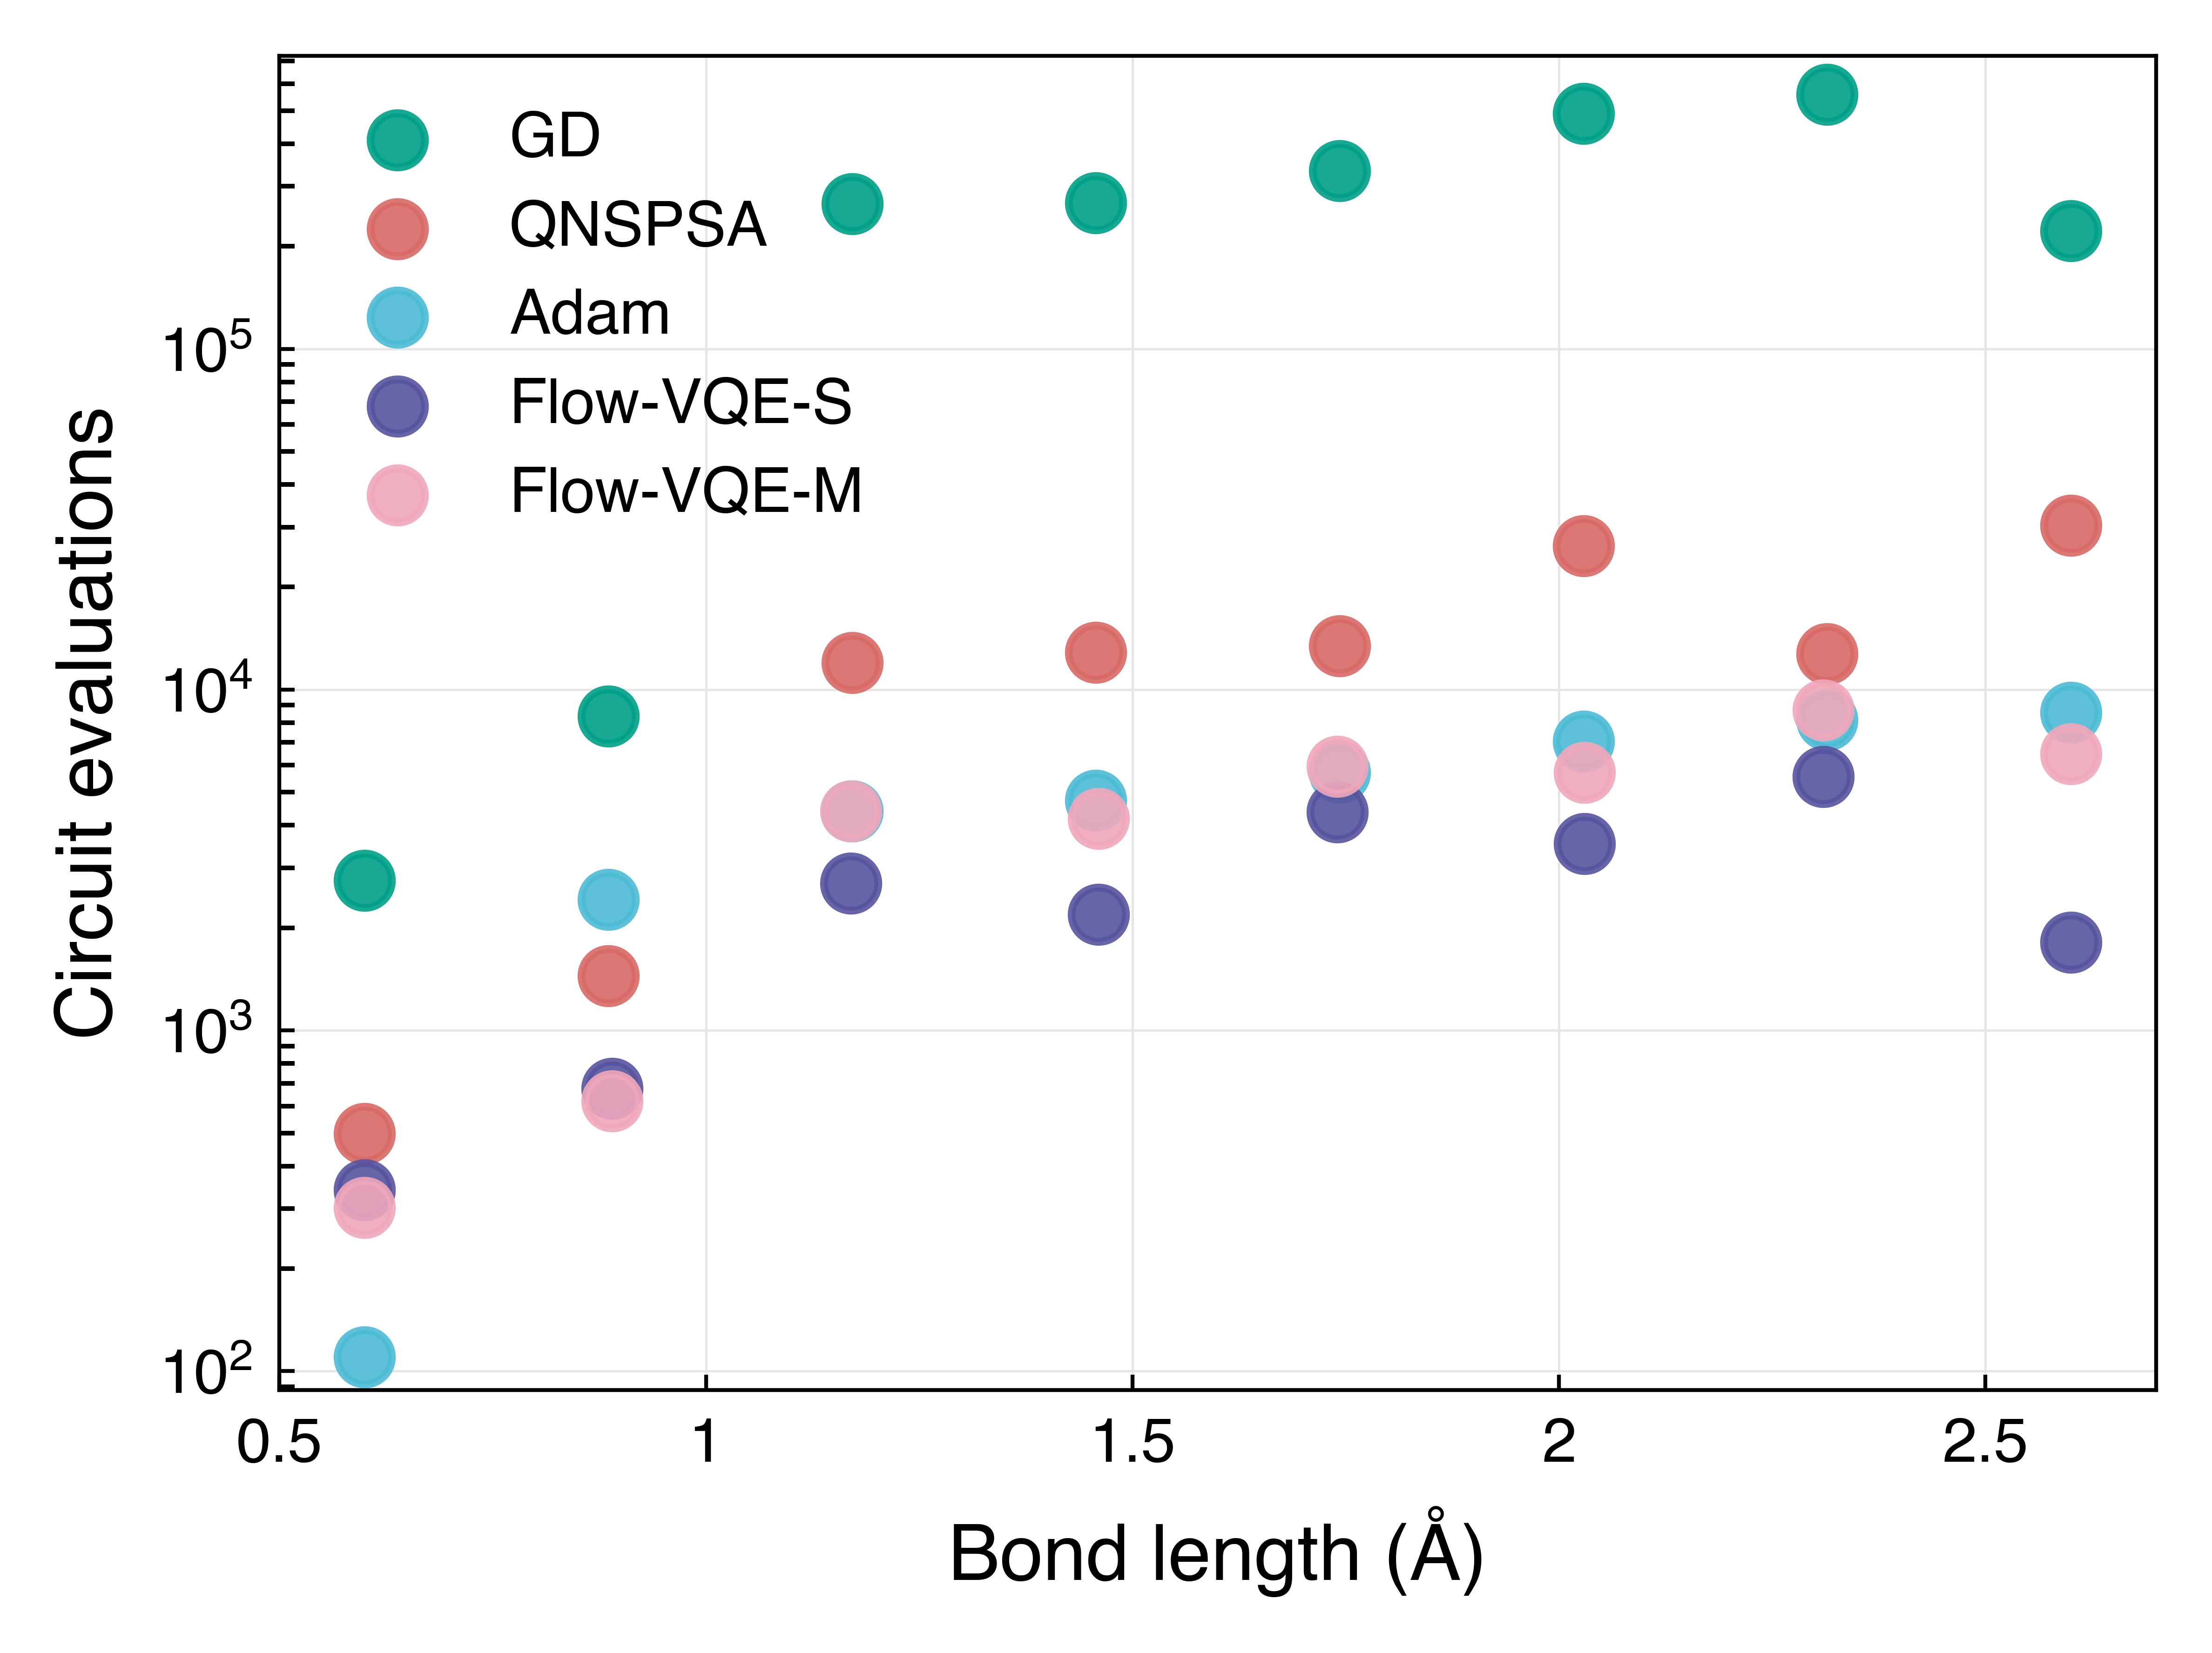

In [10]:

nature_colors = ['#d86967', '#00A087', '#4DBBD5', '#58539f', '#f0a8bb', '#3C5488', '#bbbbd6']

plt.rcParams.update({
    'font.family': 'Helvetica',
    'font.size': 8,
    'axes.linewidth': 0.5,
    'axes.labelsize': 9,
    'xtick.major.width': 0.5,
    'ytick.major.width': 0.5,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'legend.fontsize': 8,
    'legend.frameon': False,
    'figure.dpi': 1200,
})

fig, ax = plt.subplots(figsize=(4, 3))

with open('a_store_data/vqe_optimization_results_hhhh/summary_table_HHHH_L10_lr0.02.json', 'r') as f:
    data = json.load(f)

optimizers = list(set(result['optimizer'] for result in data['results']))
distances = data['distances']
 
optimizer_data = {opt: {'distances': [], 'evaluations': []} for opt in optimizers}

for result in data['results']:
    opt = result['optimizer']
    optimizer_data[opt]['distances'].append(result['distance'])
    optimizer_data[opt]['evaluations'].append(result['evaluations_to_chemical_accuracy'])

with open('a_store_data/flow_vqe_s_optimization/h4_experiment/final_results.json', 'r') as f:
    qflow_data = json.load(f)

qflow_distances = []
qflow_circuit_counts = []

for distance, result in qflow_data.items():
    qflow_distances.append(float(distance))
    qflow_circuit_counts.append(result['evaluations_at_chemical_accuracy'])

sorted_indices = np.argsort(qflow_distances)
qflow_distances = [qflow_distances[i] for i in sorted_indices]
qflow_circuit_counts = [qflow_circuit_counts[i] for i in sorted_indices]

with open('a_store_data/flow_vqe_m_h4_results/chemical_accuracy_data.json', 'r') as f:
    chemical_data = json.load(f)

chemical_distances = []
chemical_evaluations = []

for distance, evaluations in chemical_data['circuit_evaluations_at_chemical_accuracy'].items():
    chemical_distances.append(float(distance))
    chemical_evaluations.append(evaluations)

sorted_indices = np.argsort(chemical_distances)
chemical_distances = [chemical_distances[i] for i in sorted_indices]
chemical_evaluations = [chemical_evaluations[i] for i in sorted_indices]
 
optimizer_scatters = []
optimizer_labels = []

for i, opt in enumerate(optimizers):
    data = optimizer_data[opt] 
    valid_indices = [j for j, eval_val in enumerate(data['evaluations']) if eval_val is not None]
    valid_distances = [data['distances'][j] for j in valid_indices]
    valid_evaluations = [data['evaluations'][j] for j in valid_indices]
    
    scatter = ax.scatter(valid_distances, valid_evaluations,
           color=nature_colors[i % len(nature_colors)],
           s=7**2, alpha=0.9, marker='o', zorder=3)
    
    optimizer_scatters.append(scatter)
    optimizer_labels.append(opt)

 
qflow_s_color_index = len(optimizers)
qflow_scatter = ax.scatter(qflow_distances, qflow_circuit_counts,
       color=nature_colors[qflow_s_color_index % len(nature_colors)],
       s=7**2, alpha=0.9, marker='o', zorder=3)
 
qflow_m_color_index = len(optimizers) + 1
chemical_scatter = ax.scatter(chemical_distances, chemical_evaluations,
       color=nature_colors[qflow_m_color_index % len(nature_colors)],
       s=7**2, alpha=0.9, marker='o', zorder=3)
 
handles = []
labels = [] 

if len(optimizer_scatters) >= 3: 

    gd_index = optimizers.index("GD") if "GD" in optimizers else 0
    adam_index = optimizers.index("ADAM") if "ADAM" in optimizers else 1
    qnspsa_index = optimizers.index("QNSPSA") if "QNSPSA" in optimizers else 2
     
    handles.append(optimizer_scatters[gd_index])
    labels.append(optimizer_labels[gd_index])
     
    handles.append(optimizer_scatters[qnspsa_index])
    labels.append(optimizer_labels[qnspsa_index])
     
    handles.append(optimizer_scatters[adam_index])
    labels.append("Adam")  
     
    for i in range(len(optimizer_scatters)):
        if i != gd_index and i != adam_index and i != qnspsa_index:
            handles.append(optimizer_scatters[i])
            labels.append(optimizer_labels[i])
else: 
    for i in range(len(optimizer_scatters)):
        handles.append(optimizer_scatters[i])
        labels.append(optimizer_labels[i])
 
handles.append(qflow_scatter)
labels.append('Flow-VQE-S')
handles.append(chemical_scatter)
labels.append('Flow-VQE-M')
 

ax.set_xlabel('Bond length (Å)', fontsize=10)
ax.set_ylabel('Circuit evaluations', fontsize=10)
ax.set_xticks([0.5, 1, 1.5, 2, 2.5])
ax.set_xticklabels(['0.5', '1', '1.5', '2', '2.5'])

ax.grid(True, linestyle='-', linewidth=0.3, color='#E6E6E6', zorder=0)

ax.tick_params(direction='in', length=2, width=0.5)
ax.set_yscale('log')
 
ax.legend(handles=handles, labels=labels, fontsize=8,)
 
all_evaluations = []
for data in optimizer_data.values():
    all_evaluations.extend([e for e in data['evaluations'] if e is not None])
all_evaluations.extend(qflow_circuit_counts)
all_evaluations.extend(chemical_evaluations)
all_evaluations.append(10000)  
min_eval = min(all_evaluations)
max_eval = max(all_evaluations)
ax.set_ylim(min_eval * 0.8, max_eval * 1.3)
 
for spine in ['top', 'right', 'bottom', 'left']:
    ax.spines[spine].set_visible(True)
    ax.spines[spine].set_linewidth(0.5)



plt.tight_layout()

#plt.savefig('optimizers_h4_ccpvdz_lr2e-2.pdf', format='pdf', dpi=1200, bbox_inches='tight')
  
plt.show()

/var/folders/14/jdc23vnd7779t2y95qt1rc_00000gn/T/ipykernel_94734/3061269960.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0.6)


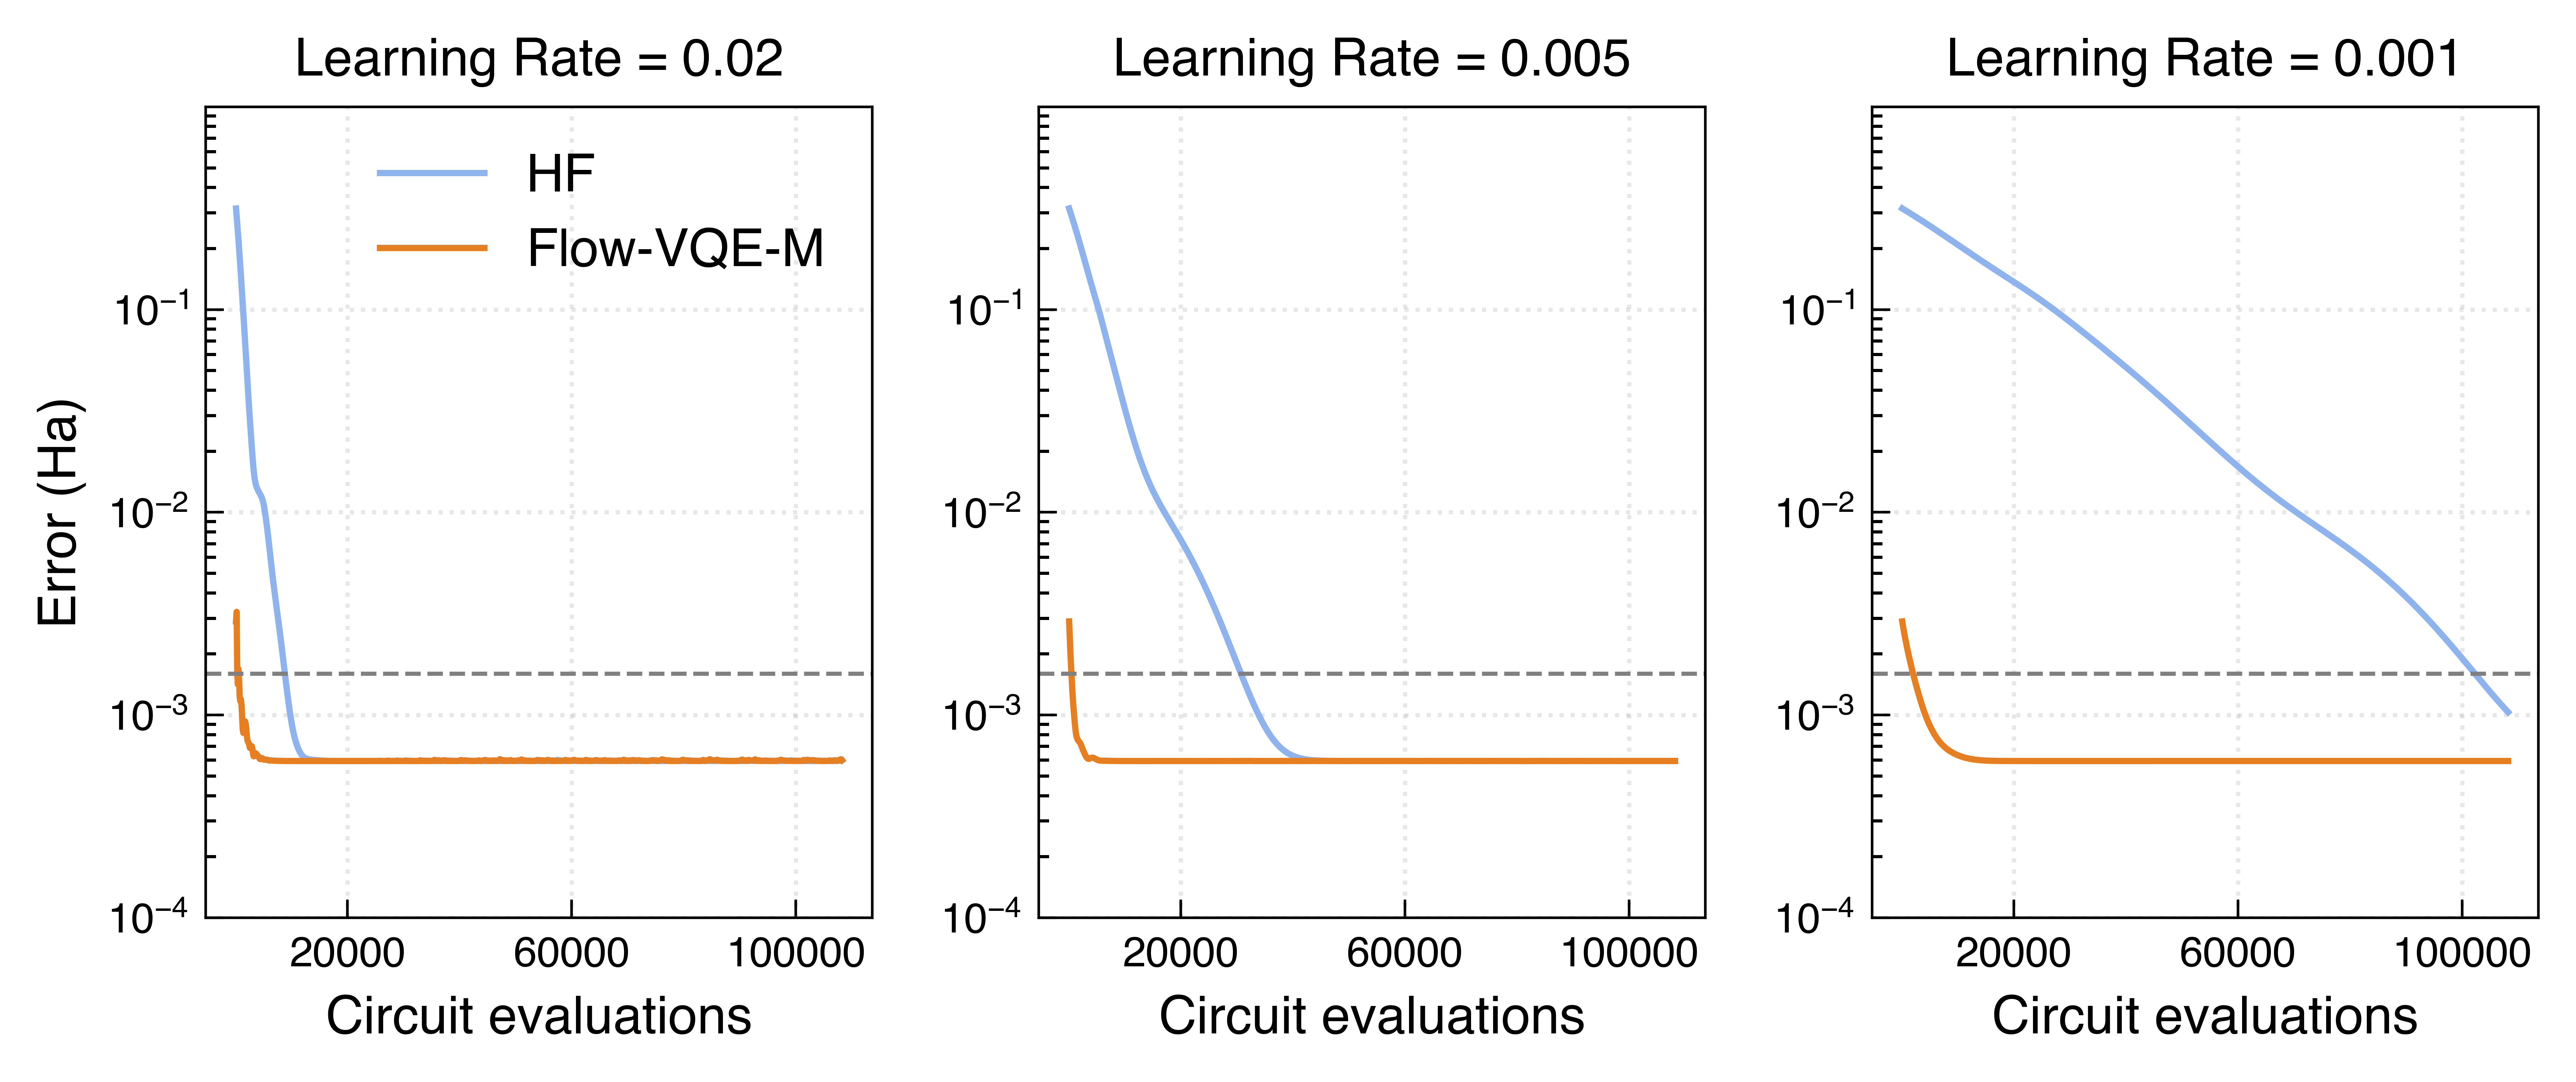

In [11]:
 
vqe_results_file2 = "a_store_data/warm_optimization_ohh/20250505_162322/vqe_results_H2O_L1_lr0.02.json"
vqe_results_file1 = "a_store_data/warm_optimization_ohh/20250505_162509/vqe_results_H2O_L1_lr0.02.json" 
vqe_results_file4 = "a_store_data/warm_optimization_ohh/20250505_162607/vqe_results_H2O_L1_lr0.005.json"
vqe_results_file3 = "a_store_data/warm_optimization_ohh/20250505_162702/vqe_results_H2O_L1_lr0.005.json"
vqe_results_file6 = "a_store_data/warm_optimization_ohh/20250505_162756/vqe_results_H2O_L1_lr0.001.json"
vqe_results_file5 = "a_store_data/warm_optimization_ohh/20250505_162850/vqe_results_H2O_L1_lr0.001.json"

ERROR_THRESHOLD = 1.6e-3

def create_visualization(vqe_results1, vqe_results2,
                         vqe_results3, vqe_results4,
                         vqe_results5, vqe_results6,):
 
    fig = plt.figure(figsize=(8.0, 2.8))
    gs = fig.add_gridspec(1, 3, width_ratios=[1, 1, 1], wspace=0.25)

    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1], sharey=ax1)
    ax3 = fig.add_subplot(gs[0, 2], sharey=ax1)

    light_blue = "#8EB3ED"
    orange = "#E67E22"

    def process_and_plot(vqe_results, ax, color, label):
        for dist in vqe_results:
            results = list(vqe_results[dist].values())[0]
            cost_history = results["cost_history"]

            num_circuits = 108  # 108 for H2O, 110 for H4
            x_values = np.array([num_circuits * (n + 1) for n in range(len(cost_history))])
            error_history = [abs(energy) for energy in cost_history]

            ax.semilogy(x_values, error_history,
                        color=color, linestyle='solid', linewidth=1.2,
                        label=label)
            label = "_nolegend_"

    # Panel 1: Run 1 and 2 (lr=0.02)
    process_and_plot(vqe_results1, ax1, light_blue, "HF")
    process_and_plot(vqe_results2, ax1, orange, "Flow-VQE-M")
    ax1.axhline(y=ERROR_THRESHOLD, color='#808080', linestyle='--', linewidth=0.8)
    ax1.set_title('Learning Rate = 0.02', fontsize=10)
    ax1.set_xlabel('Circuit evaluations', fontsize=10)
    ax1.set_ylabel('Error (Ha)', fontsize=10)
    ax1.set_ylim(5e-4, 1)
    ax1.legend(frameon=False, loc='upper right', fontsize=10)

    # Panel 2: Run 3 and 4 (lr=0.005)
    process_and_plot(vqe_results3, ax2, light_blue, "Run 3 (lr=0.005)")
    process_and_plot(vqe_results4, ax2, orange, "Run 4 (lr=0.005)")
    ax2.axhline(y=ERROR_THRESHOLD, color='#808080', linestyle='--', linewidth=0.8,
                label='Comp. Accuracy')
    ax2.set_title('Learning Rate = 0.005', fontsize=10)
    ax2.set_xlabel('Circuit evaluations', fontsize=10)

    # Panel 3: Run 5 and 6 (lr=0.001)
    process_and_plot(vqe_results5, ax3, light_blue, "Run 5 (lr=0.001)")
    process_and_plot(vqe_results6, ax3, orange, "Run 6 (lr=0.001)")
    ax3.axhline(y=ERROR_THRESHOLD, color='#808080', linestyle='--', linewidth=0.8)
    ax3.set_title('Learning Rate = 0.001', fontsize=10)
    ax3.set_xlabel('Circuit evaluations', fontsize=10)

    yticks = [1e-4, 1e-3, 1e-2, 1e-1]

    xticks = [20000, 60000, 100000]
    for ax in [ax1, ax2, ax3]:
        ax.set_xticks(xticks)

        ax.set_yticks(yticks)
        ax.yaxis.set_major_formatter(
            mpl.ticker.LogFormatterSciNotation(labelOnlyBase=False)
        )
        ax.grid(True, which='major', axis='both', linestyle=':', alpha=0.3)
    plt.setp(ax2.get_yticklabels(), visible=True)
    plt.setp(ax3.get_yticklabels(), visible=True)

    plt.tight_layout(pad=0.6)
 
    #plt.savefig(f"warm_optimization_comparison_OHH.pdf", format='pdf', dpi=1200, bbox_inches='tight', pad_inches=0.1) 
    plt.show()


def load_json_data(filepath):
    with open(filepath, 'r') as f:
        return json.load(f)


def main(): 
    vqe_results1 = load_json_data(vqe_results_file1)
    vqe_results2 = load_json_data(vqe_results_file2)
    vqe_results3 = load_json_data(vqe_results_file3)
    vqe_results4 = load_json_data(vqe_results_file4)
    vqe_results5 = load_json_data(vqe_results_file5)
    vqe_results6 = load_json_data(vqe_results_file6)

    create_visualization(
        vqe_results1, vqe_results2,
        vqe_results3, vqe_results4,
        vqe_results5, vqe_results6, 
    )


if __name__ == "__main__":
    main()



/var/folders/14/jdc23vnd7779t2y95qt1rc_00000gn/T/ipykernel_94734/1783101613.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0.6)


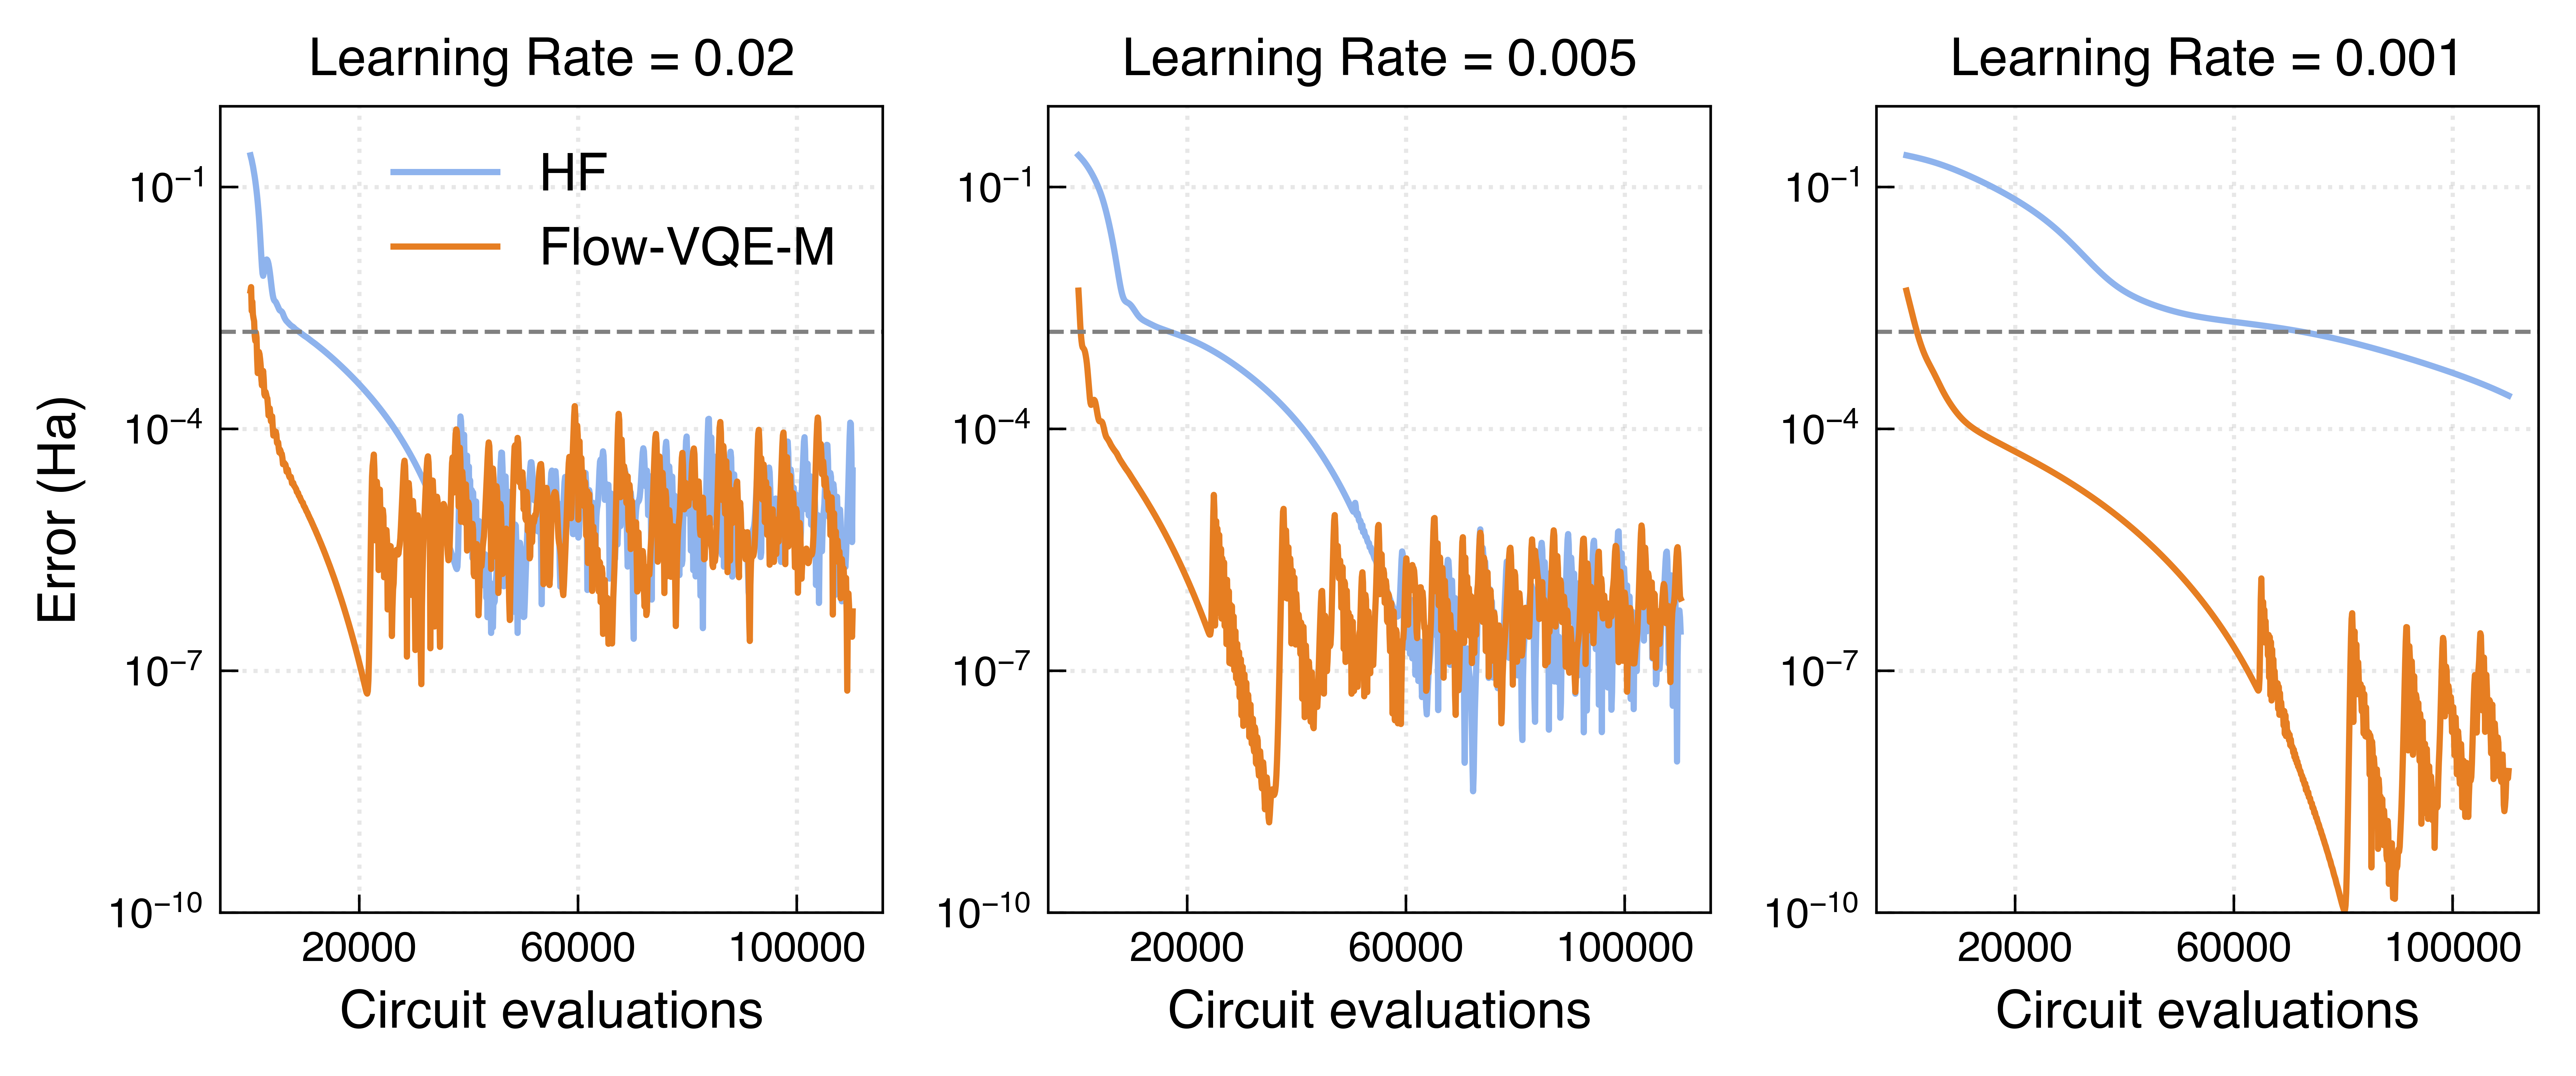

In [12]:
 
vqe_results_file1 = "a_store_data/warm_optimization_hhhh/20250505_155913/vqe_results_H4_L10_lr0.02.json"
vqe_results_file2 = "a_store_data/warm_optimization_hhhh/20250505_160003/vqe_results_H4_L10_lr0.02.json"
vqe_results_file3 = "a_store_data/warm_optimization_hhhh/20250505_161018/vqe_results_H4_L10_lr0.005.json"
vqe_results_file4 = "a_store_data/warm_optimization_hhhh/20250505_160928/vqe_results_H4_L10_lr0.005.json"
vqe_results_file5 = "a_store_data/warm_optimization_hhhh/20250505_161406/vqe_results_H4_L10_lr0.001.json"
vqe_results_file6 = "a_store_data/warm_optimization_hhhh/20250505_161114/vqe_results_H4_L10_lr0.001.json"

 
results_dir = "warm_optimization_results"
os.makedirs(results_dir, exist_ok=True)


def load_json_data(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)


def create_visualization(vqe_results1, vqe_results2, vqe_results3,
                         vqe_results4, vqe_results5, vqe_results6):
    fig = plt.figure(figsize=(8.0, 2.8))
    gs = fig.add_gridspec(1, 3, width_ratios=[1, 1, 1], wspace=0.25)

    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1], sharey=ax1)
    ax3 = fig.add_subplot(gs[0, 2], sharey=ax1)

    light_blue = "#8EB3ED"
    orange = "#E67E22"

    def process_and_plot(vqe_results, ax, color, label):
        for dist in vqe_results:
            results = list(vqe_results[dist].values())[0]
            cost_history = results["cost_history"]
            num_circuits = 110  # H4
            x_vals = np.array([num_circuits * (n + 1) for n in range(len(cost_history))])
            errors = [abs(e) for e in cost_history]
            ax.semilogy(x_vals, errors, color=color, linestyle='solid', linewidth=1.2, label=label)
            label = "_nolegend_"

    # Panel 1
    process_and_plot(vqe_results1, ax1, light_blue, "HF")
    process_and_plot(vqe_results2, ax1, orange, "Flow-VQE-M")
    ax1.axhline(ERROR_THRESHOLD, color='#808080', linestyle='--', linewidth=0.8)
    ax1.set_title('Learning Rate = 0.02', fontsize=10)
    ax1.set_xlabel('Circuit evaluations', fontsize=10)
    ax1.set_ylabel('Error (Ha)', fontsize=10)
    ax1.set_ylim(1e-10, 1)
    ax1.legend(frameon=False, loc='upper right', fontsize=10)

    # Panel 2
    process_and_plot(vqe_results3, ax2, light_blue, "Run 3 (lr=0.005)")
    process_and_plot(vqe_results4, ax2, orange, "Run 4 (lr=0.005)")
    ax2.axhline(ERROR_THRESHOLD, color='#808080', linestyle='--', linewidth=0.8)
    ax2.set_title('Learning Rate = 0.005', fontsize=10)
    ax2.set_xlabel('Circuit evaluations', fontsize=10)

    # Panel 3
    process_and_plot(vqe_results5, ax3, light_blue, "Run 5 (lr=0.001)")
    process_and_plot(vqe_results6, ax3, orange, "Run 6 (lr=0.001)")
    ax3.axhline(ERROR_THRESHOLD, color='#808080', linestyle='--', linewidth=0.8)
    ax3.set_title('Learning Rate = 0.001', fontsize=10)
    ax3.set_xlabel('Circuit evaluations', fontsize=10)

    xticks = [20000, 60000,  100000]
    yticks = [1e-10, 1e-7, 1e-4, 1e-1]

    for ax in [ax1, ax2, ax3]:
        ax.set_xticks(xticks)
        ax.set_yticks(yticks)
        ax.yaxis.set_major_formatter(mpl.ticker.LogFormatterSciNotation(labelOnlyBase=False))
        ax.grid(True, which='major', axis='both', linestyle=':', alpha=0.3)

    plt.setp(ax2.get_yticklabels(), visible=True)
    plt.setp(ax3.get_yticklabels(), visible=True)

    plt.tight_layout(pad=0.6)
    #plt.savefig(f"warm_optimization_comparison_HHHH.pdf", format='pdf', dpi=1200, bbox_inches='tight', pad_inches=0.1) 
    plt.show()


def main(): 
    files = [vqe_results_file1, vqe_results_file2, vqe_results_file3,
             vqe_results_file4, vqe_results_file5, vqe_results_file6]
    data = [load_json_data(f) for f in files]
    create_visualization(*data)
 
if __name__ == "__main__":
    main()


In [18]:
 
with open('a_store_data/warm_optimization_results_nh3/summary_table_NH3_L1_lr0.02.json', 'r') as f:
    data1 = json.load(f)
with open('a_store_data/pt_optimization_results_nh3/20250512_221747/summary_table_NH3_L1_lr0.02.json', 'r') as f:
    data2 = json.load(f)
with open('a_store_data/vqe_optimization_results_nh3/summary_table_NH3_L1_lr0.02.json', 'r') as f:
    data3 = json.load(f)

evaluations1 = [result['evaluations_to_computational_accuracy'] for result in data1['results']]  # QFlows-M
evaluations2 = [result['evaluations_to_computational_accuracy'] for result in data2['results']]  # PT
evaluations3 = [result['evaluations_to_computational_accuracy'] for result in data3['results']]  # HF


avg_qflows = sum(evaluations1) / len(evaluations1)
total_qflows = sum(evaluations1)

avg_pt = sum(evaluations2) / len(evaluations2)
total_pt = sum(evaluations2)

avg_hf = sum(evaluations3) / len(evaluations3)
total_hf = sum(evaluations3)

print("QFlows-M:")
print(f"  Values: {evaluations1}")
print(f"  Average: {avg_qflows}")
print(f"  Total: {total_qflows}")

print("PT:")
print(f"  Values: {evaluations2}")
print(f"  Average: {avg_pt}")
print(f"  Total: {total_pt}")

print("HF:")
print(f"  Values: {evaluations3}")
print(f"  Average: {avg_hf}")
print(f"  Total: {total_hf}")
 

QFlows-M:
  Values: [4446, 3744, 1404, 1638, 1638, 1638, 1638, 1404, 3510, 4212]
  Average: 2527.2
  Total: 25272
PT:
  Values: [5148, 4914, 2808, 3978, 3978, 3978, 3978, 2808, 4914, 5148]
  Average: 4165.2
  Total: 41652
HF:
  Values: [5850, 5850, 4914, 4914, 4680, 4680, 4914, 5148, 5850, 5850]
  Average: 5265.0
  Total: 52650


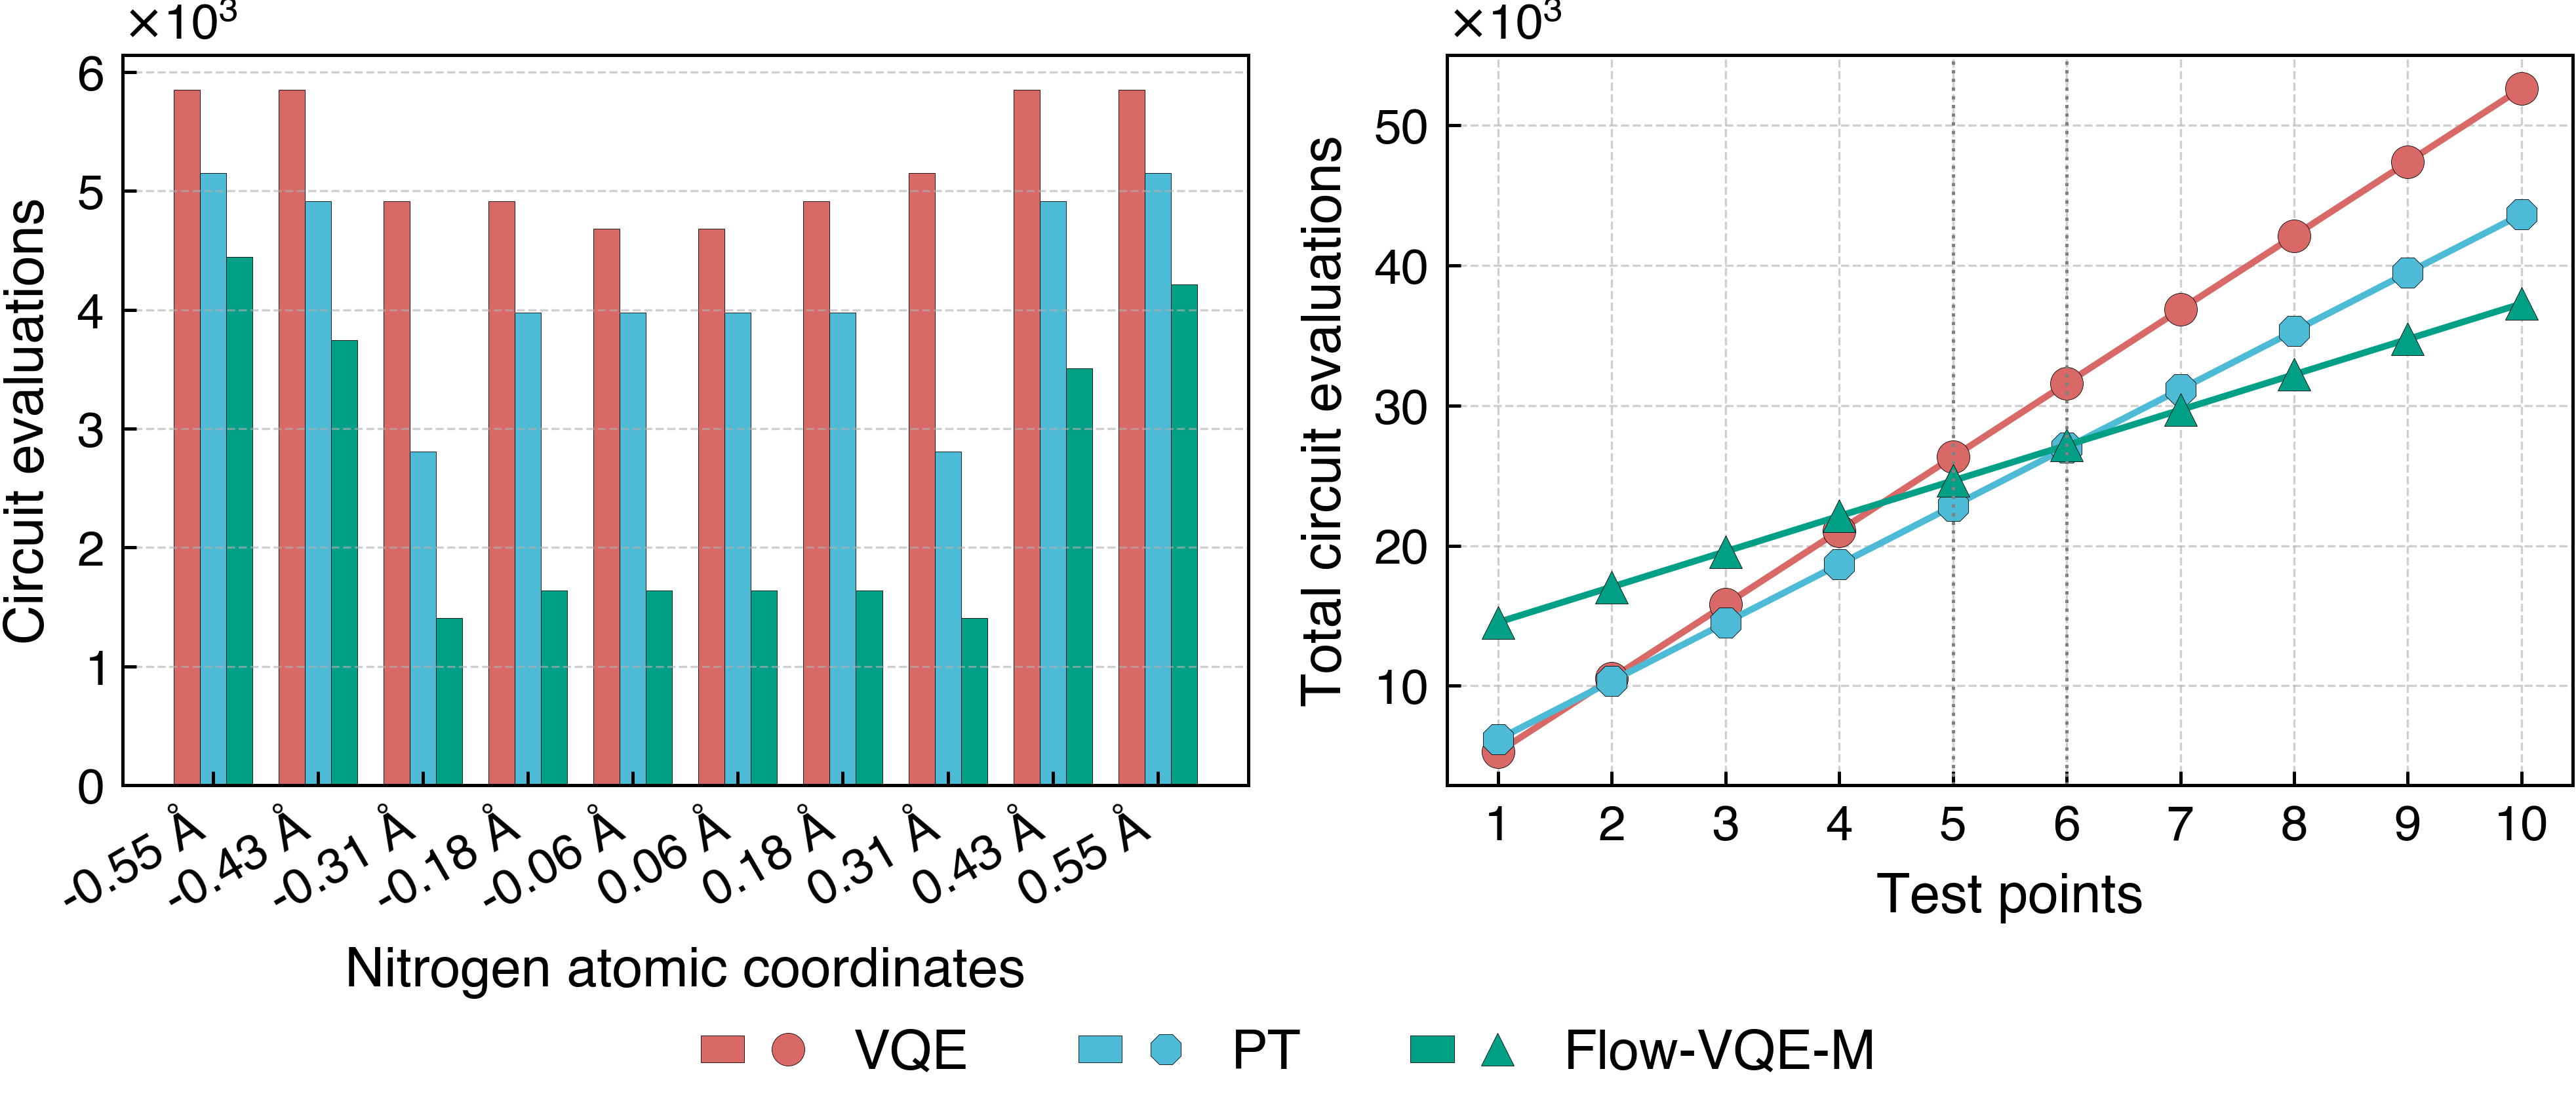

In [19]:
 
plt.rcParams.update({
    'font.family': 'Helvetica',
    'font.size': 9,
    'axes.linewidth': 0.6,
    'axes.labelsize': 10,
    'xtick.major.width': 0.6,
    'ytick.major.width': 0.6,
    'xtick.major.size': 2.5,
    'ytick.major.size': 2.5,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'legend.fontsize': 9,
    'legend.frameon': False,
    'figure.dpi': 600,
    'figure.figsize': (6.8, 2.8),
    'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.01,
})

nature_colors = ['#d86967', '#00A087', '#4DBBD5']  # VQE, QFlows-M, PT
 

distances = []
evaluations1, evaluations2, evaluations3 = [], [], []

for r1, r2, r3 in zip(data1['results'], data2['results'], data3['results']):
    distances.append(r1['distance'])
    evaluations1.append(r1['evaluations_to_computational_accuracy'])
    evaluations2.append(r2['evaluations_to_computational_accuracy'])
    evaluations3.append(r3['evaluations_to_computational_accuracy'])

x_labels = [f'{d:.2f} Å' for d in distances]
x = np.arange(len(distances))
width = 0.25

n_test = np.arange(1, 11)
vqe_eval, qflows_eval, pt_eval = 5265, 2527, 4165
qflows_train, pt_train = 12000, 2000

vqe_cost = vqe_eval * n_test
qflows_cost = qflows_train + qflows_eval * n_test
pt_cost = pt_train + pt_eval * n_test

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False)

bars1 = ax1.bar(x - width, evaluations3, width, color=nature_colors[0], edgecolor='black', linewidth=0.1)
bars2 = ax1.bar(x, evaluations2, width, color=nature_colors[2], edgecolor='black', linewidth=0.1)
bars3 = ax1.bar(x + width, evaluations1, width, color=nature_colors[1], edgecolor='black', linewidth=0.1)

ax1.set_xlabel('Nitrogen atomic coordinates', fontsize=10)
ax1.set_ylabel('Circuit evaluations', fontsize=10)
ax1.set_xticks(x)
ax1.set_xticklabels(x_labels, rotation=30, ha='right')
 

ax1.yaxis.grid(True, linestyle='--', alpha=0.6, linewidth=0.4)

formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((3, 3))
ax1.yaxis.set_major_formatter(formatter)

line1 = ax2.plot(n_test, vqe_cost, color=nature_colors[0], linestyle='-', marker='o', 
                linewidth=1.2, markersize=6, markeredgecolor='black', markeredgewidth=0.1)[0]
line2 = ax2.plot(n_test, pt_cost, color=nature_colors[2], linestyle='-', marker='8', 
                linewidth=1.2, markersize=6, markeredgecolor='black', markeredgewidth=0.1)[0]
line3 = ax2.plot(n_test, qflows_cost, color=nature_colors[1], linestyle='-', marker='^', 
                linewidth=1.2, markersize=6, markeredgecolor='black', markeredgewidth=0.1)[0]

ax2.axvline(5, color='gray', linestyle=':', linewidth=0.6)
ax2.axvline(6, color='gray', linestyle=':', linewidth=0.6)

ax2.set_xlabel('Test points', fontsize=10)
ax2.set_ylabel('Total circuit evaluations', fontsize=10)
ax2.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
ax2.yaxis.set_major_formatter(formatter)
ax2.grid(True, linestyle='--', linewidth=0.4, alpha=0.6)

class HandlerBarLine(HandlerBase):
    def create_artists(self, legend, orig_handle, xdescent, ydescent, width, height, fontsize, trans):
        color, linestyle, marker = orig_handle
        
        from matplotlib.patches import Rectangle
         
        bar_width = width * 0.4
        bar_height = height * 0.7  
        bar = Rectangle(
            xy=(xdescent, ydescent + (height - bar_height) / 2),   
            width=bar_width,
            height=bar_height,
            facecolor=color,
            edgecolor='black',
            linewidth=0.1,
            transform=trans
        )
         
        marker_x = xdescent + bar_width + width * 0.4  
        
        marker = Line2D(
            [marker_x],  
            [ydescent + height / 2],  
            color=color,
            marker=marker,
            markersize=6,  
            markeredgecolor='black',  
            markeredgewidth=0.1,       
            linestyle='None',  
            transform=trans
        )
        
        return [bar, marker]

custom_handlers = [
    (nature_colors[0], '-', 'o'),  
    (nature_colors[2], '--', '8'), 
    (nature_colors[1], '-.', '^')   
]

labels = ['VQE', 'PT', 'Flow-VQE-M']

fig.legend(
    custom_handlers,
    labels,
    handler_map={tuple: HandlerBarLine()},
    loc='lower center',
    ncol=3,
    fontsize=10,
    bbox_to_anchor=(0.5, -0.07)
)
 
plt.subplots_adjust(wspace=0.3, bottom=0.25)
plt.tight_layout()
#plt.savefig('nh3_optimization_comparison.pdf', format='pdf', dpi=1200) 
plt.show()

In [20]:
# Read JSON VQE
with open('a_store_data/warm_optimization_results_c6h6/summary_table_C6H6_L1_lr0.02.json', 'r') as f:
    data1 = json.load(f)
# Read JSON PT
with open('a_store_data/pt_optimization_results_c6h6/20250517_021655/summary_table_C6H6-s_L1_lr0.02.json', 'r') as f:
    data2 = json.load(f)
# Read JSON HF
with open('a_store_data/vqe_optimization_results_c6h6/summary_table_C6H6_L1_lr0.02.json', 'r') as f:
    data3 = json.load(f)

evaluations1 = [result['evaluations_to_computational_accuracy'] for result in data1['results']]  # QFlows-M
evaluations2 = [result['evaluations_to_computational_accuracy'] for result in data2['results']]  # HF
evaluations3 = [result['evaluations_to_computational_accuracy'] for result in data3['results']]  # PT

# Calculate statistics for QFlows-M
avg_qflows = sum(evaluations1) / len(evaluations1)
total_qflows = sum(evaluations1)
# Calculate statistics for PT
avg_pt = sum(evaluations2) / len(evaluations2)
total_pt = sum(evaluations2)
# Calculate statistics for HF
avg_hf = sum(evaluations3) / len(evaluations3)
total_hf = sum(evaluations3)

print("QFlows-M:")
print(f"  Values: {evaluations1}")
print(f"  Average: {avg_qflows}")
print(f"  Total: {total_qflows}")

print("PT:")
print(f"  Values: {evaluations2}")
print(f"  Average: {avg_pt}")
print(f"  Total: {total_pt}")

print("HF:")
print(f"  Values: {evaluations3}")
print(f"  Average: {avg_hf}")
print(f"  Total: {total_hf}")

QFlows-M:
  Values: [3744, 2808, 2808, 1638, 2808, 1638, 1638, 1638, 1404, 1404]
  Average: 2152.8
  Total: 21528
PT:
  Values: [9594, 2808, 9594, 2808, 9360, 2574, 2574, 9126, 8892, 1404]
  Average: 5873.4
  Total: 58734
HF:
  Values: [11700, 11700, 11466, 11466, 11232, 11232, 10998, 10764, 8892, 8424]
  Average: 10787.4
  Total: 107874


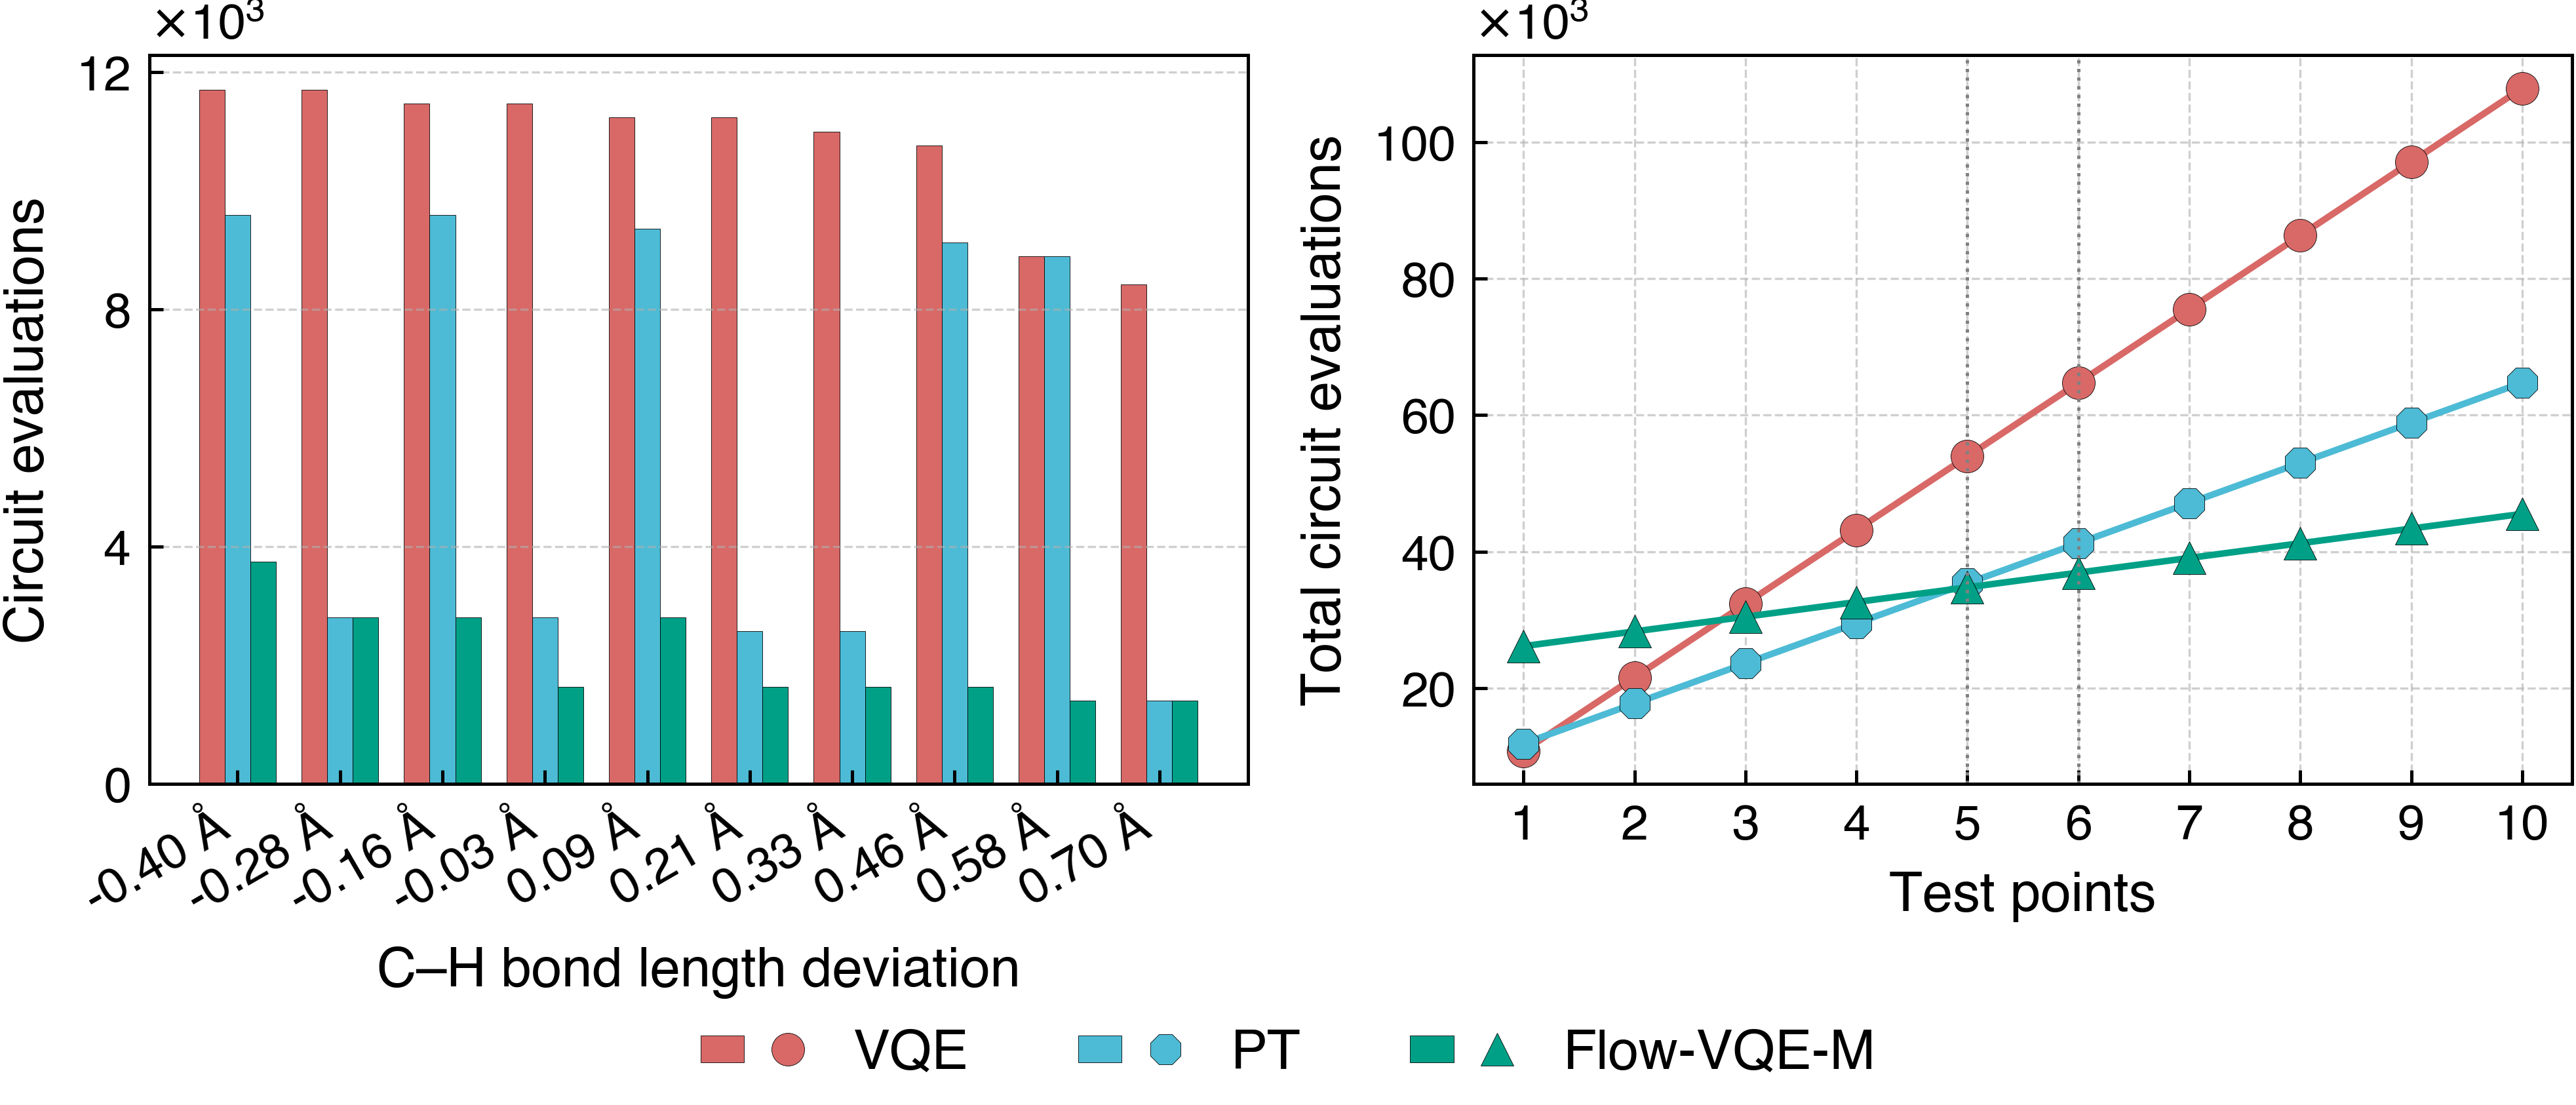

In [21]:
 
distances = []
evaluations1, evaluations2, evaluations3 = [], [], []

for r1, r2, r3 in zip(data1['results'], data2['results'], data3['results']):
    distances.append(r1['distance'])
    evaluations1.append(r1['evaluations_to_computational_accuracy'])
    evaluations2.append(r2['evaluations_to_computational_accuracy'])
    evaluations3.append(r3['evaluations_to_computational_accuracy'])

x_labels = [f'{d:.2f} Å' for d in distances]
x = np.arange(len(distances))
width = 0.25

n_test = np.arange(1, 11)
vqe_eval, qflows_eval, pt_eval = avg_hf, avg_qflows, avg_pt
qflows_train, pt_train = 24000, 6000

vqe_cost = vqe_eval * n_test
qflows_cost = qflows_train + qflows_eval * n_test
pt_cost = pt_train + pt_eval * n_test

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False)

bars1 = ax1.bar(x - width, evaluations3, width, color=nature_colors[0], edgecolor='black', linewidth=0.1)
bars2 = ax1.bar(x, evaluations2, width, color=nature_colors[2], edgecolor='black', linewidth=0.1)
bars3 = ax1.bar(x + width, evaluations1, width, color=nature_colors[1], edgecolor='black', linewidth=0.1)

ax1.set_xlabel('C–H bond length deviation', fontsize=10)
ax1.set_ylabel('Circuit evaluations', fontsize=10)
ax1.set_xticks(x)
#ax1.xaxis.set_major_locator(ticker.MaxNLocator(5))
ax1.set_xticklabels(x_labels, rotation=30, ha='right')

#ax1.set_yscale('log')
#ax1.set_ylim(20000, 46000)
ax1.yaxis.grid(True, linestyle='--', alpha=0.6, linewidth=0.4)

formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((3, 3))
ax1.yaxis.set_major_formatter(formatter)
ax1.yaxis.set_major_locator(ticker.MaxNLocator(4))  

ax1.set_xticklabels(x_labels, rotation=30, ha='right')

line1 = ax2.plot(n_test, vqe_cost, color=nature_colors[0], linestyle='-', marker='o', 
                linewidth=1.2, markersize=6, markeredgecolor='black', markeredgewidth=0.1)[0]
line2 = ax2.plot(n_test, pt_cost, color=nature_colors[2], linestyle='-', marker='8', 
                linewidth=1.2, markersize=6, markeredgecolor='black', markeredgewidth=0.1)[0]
line3 = ax2.plot(n_test, qflows_cost, color=nature_colors[1], linestyle='-', marker='^', 
                linewidth=1.2, markersize=6, markeredgecolor='black', markeredgewidth=0.1)[0]

ax2.axvline(5, color='gray', linestyle=':', linewidth=0.6)
ax2.axvline(6, color='gray', linestyle=':', linewidth=0.6)

ax2.set_xlabel('Test points', fontsize=10)
ax2.set_ylabel('Total circuit evaluations', fontsize=10)
ax2.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
ax2.yaxis.set_major_formatter(formatter)
 
ax2.grid(True, linestyle='--', linewidth=0.4, alpha=0.6)

class HandlerBarLine(HandlerBase):
    def create_artists(self, legend, orig_handle, xdescent, ydescent, width, height, fontsize, trans):
        color, linestyle, marker = orig_handle
        
        from matplotlib.patches import Rectangle
         
        bar_width = width * 0.4
        bar_height = height * 0.7 
        bar = Rectangle(
            xy=(xdescent, ydescent + (height - bar_height) / 2), 
            width=bar_width,
            height=bar_height,
            facecolor=color,
            edgecolor='black',
            linewidth=0.1,
            transform=trans
        )
        
        marker_x = xdescent + bar_width + width * 0.4  
        
        marker = Line2D(
            [marker_x], 
            [ydescent + height / 2],
            color=color,
            marker=marker,
            markersize=6,  
            markeredgecolor='black',  
            markeredgewidth=0.1,     
            linestyle='None', 
            transform=trans
        )
        
        return [bar, marker]

custom_handlers = [
    (nature_colors[0], '-', 'o'),  # VQE
    (nature_colors[2], '--', '8'),  # PT
    (nature_colors[1], '-.', '^')   # QFlows-M
]

labels = ['VQE', 'PT', 'Flow-VQE-M']

fig.legend(
    custom_handlers,
    labels,
    handler_map={tuple: HandlerBarLine()},
    loc='lower center',
    ncol=3,
    fontsize=10,
    bbox_to_anchor=(0.5, -0.07)
) 

plt.subplots_adjust(wspace=0.3, bottom=0.25)
plt.tight_layout()
#plt.savefig('c6h6_s_optimization_comparison.pdf', format='pdf', dpi=1200) 
plt.show()

Training distances: [0.6        0.88571429 1.17142857 1.45714286 1.74285714 2.02857143
 2.31428571 2.6       ]


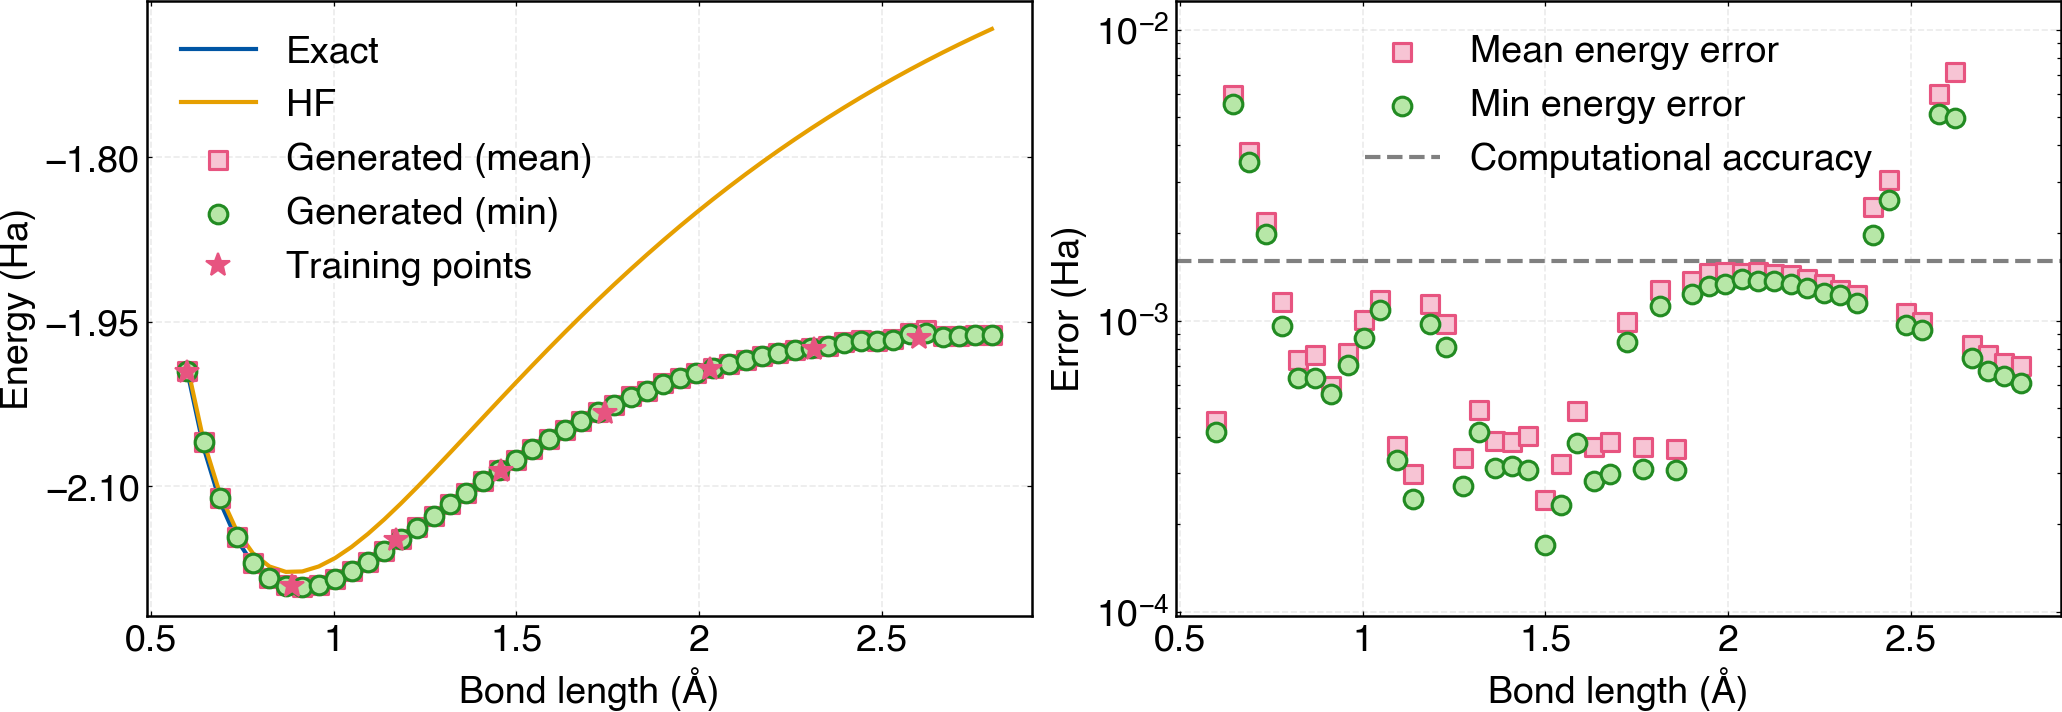

In [22]:

def load_pes_data(json_file_path):
    with open(json_file_path, 'r') as f:
        data = json.load(f)
    return data

def plot_potential_energy_surface(pes_data, training_distances=None, save_path=None):
 
    
    mpl.rcParams.update({
        'font.family': 'serif',
        'font.serif': ['Helvetica'],
        'axes.labelsize': 18,
        'axes.titlesize': 20,
        'xtick.labelsize': 18,
        'ytick.labelsize': 18,
        'legend.fontsize': 18,
        'axes.linewidth': 1.2,
        'xtick.direction': 'in',
        'ytick.direction': 'in',
        'xtick.top': True,
        'ytick.right': True,
        'figure.dpi': 150,
        'axes.grid': True,
        'grid.alpha': 0.25,
        'grid.linestyle': '--',
        'savefig.bbox': 'tight',
        'pdf.fonttype': 42,
        'ps.fonttype': 42
    })

    bond_lengths = pes_data['bond_lengths']
    exact_energies = pes_data['exact_energies']
    generated_min_energies = pes_data['generated_min_energies']
    generated_mean_energies = pes_data['generated_mean_energies']
    errors = pes_data['errors']
    hf_energies = pes_data['hf_energies']

    mean_errors = [gm - ex for gm, ex in zip(generated_mean_energies, exact_energies)]
    min_errors = errors

    exact_color = '#0055A4'
    hf_color = '#E69F00'
    min_face = '#B7E7A7'
    min_edge = '#228B22'
    mean_face = '#F7C4D4'
    mean_edge = '#E75480'
    train_color = '#E75480'

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    ax = axes[0]
    ax.plot(bond_lengths, exact_energies, '-', color=exact_color, label='Exact', linewidth=2)
    ax.plot(bond_lengths, hf_energies, '-', color=hf_color, label='HF', linewidth=2)
    ax.scatter(bond_lengths, generated_mean_energies, label='Generated (mean)',
               marker='s', s=80, facecolor=mean_face, edgecolor=mean_edge, linewidth=1.5, zorder=3)
    ax.scatter(bond_lengths, generated_min_energies, label='Generated (min)',
               marker='o', s=80, facecolor=min_face, edgecolor=min_edge, linewidth=1.5, zorder=4)

    if training_distances is not None:
        training_exact_y = []
        for td in training_distances:
            idx = np.argmin([abs(bl - td) for bl in bond_lengths])
            training_exact_y.append(exact_energies[idx])
        ax.plot(training_distances, training_exact_y, marker='*', linestyle='None',
                color=train_color, markersize=12, label='Training points', zorder=10)

    ax.set_xlabel('Bond length (Å)')
    ax.set_ylabel('Energy (Ha)')
    ax.legend(frameon=False)
    ax.set_xticks([0.5, 1, 1.5, 2, 2.5])
    ax.set_xticklabels(['0.5', '1', '1.5', '2', '2.5'])

    ax.yaxis.set_major_locator(MaxNLocator(nbins=5))

    for spine in ax.spines.values():
        spine.set_visible(True)

    ax2 = axes[1]
    ax2.scatter(bond_lengths, mean_errors, label='Mean energy error',
                marker='s', s=80, facecolor=mean_face, edgecolor=mean_edge, linewidth=1.5, zorder=3)
    ax2.scatter(bond_lengths, min_errors, label='Min energy error',
                marker='o', s=80, facecolor=min_face, edgecolor=min_edge, linewidth=1.5, zorder=4)
    ax2.axhline(y=1.6e-3, color='gray', linestyle='--', linewidth=2, label='Computational accuracy')

    ax2.set_xlabel('Bond length (Å)')
    ax2.set_ylabel('Error (Ha)')
    ax2.set_yscale('log')
    ax2.legend(frameon=False)
    ax2.set_xticks([0.5, 1, 1.5, 2, 2.5])
    ax2.set_xticklabels(['0.5', '1', '1.5', '2', '2.5'])
    ax2.margins(y=0.15)

    for spine in ax2.spines.values():
        spine.set_visible(True)

    plt.tight_layout()

    #plt.savefig("reproduced_h4_pes.pdf", dpi=1200, bbox_inches='tight')
 
    plt.show()

if __name__ == '__main__':
    pes_data = load_pes_data('a_store_data/flow_vqe_m_h4_results/pes_data.json')
    training_distances = np.linspace(0.6, 2.6, 8)
    print(f"Training distances: {training_distances}")
    plot_potential_energy_surface(pes_data, training_distances, 'reproduced_h4_pes.pdf')


Training distances: [0.8 1.  1.2 1.4 1.6 1.8]


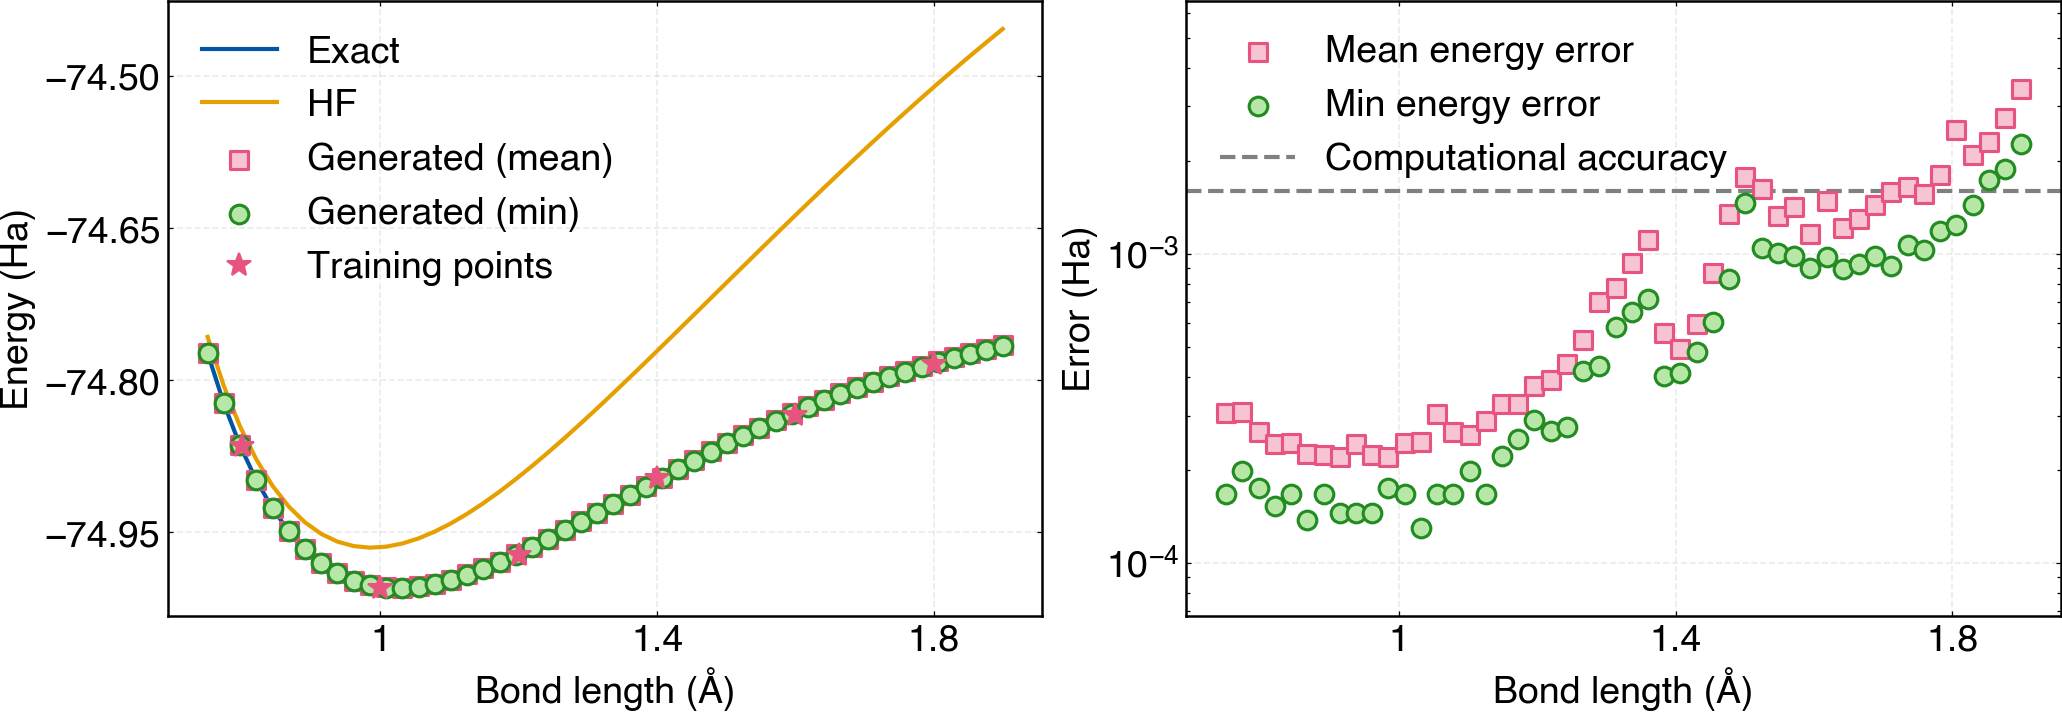

In [23]:
def plot_potential_energy_surface(pes_data, training_distances=None, save_path=None):
     
    bond_lengths = pes_data['bond_lengths']
    exact_energies = pes_data['exact_energies']
    generated_min_energies = pes_data['generated_min_energies']
    generated_mean_energies = pes_data['generated_mean_energies']
    errors = pes_data['errors']
    hf_energies = pes_data['hf_energies']

    mean_errors = [generated_mean - exact for generated_mean, exact in zip(generated_mean_energies, exact_energies)]
    min_errors = [error for error in errors]

    exact_color = '#0055A4'    
    hf_color = '#E69F00'        
    min_face = '#B7E7A7'        
    min_edge = '#228B22'       
    mean_face = '#F7C4D4'        
    mean_edge = '#E75480'       
    train_color = '#E75480'      

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    ax = axes[0]
    ax.plot(bond_lengths, exact_energies, '-', color=exact_color, label='Exact', linewidth=2)
    ax.plot(bond_lengths, hf_energies, '-', color=hf_color, label='HF', linewidth=2)
    ax.scatter(bond_lengths, generated_mean_energies, label='Generated (mean)',
               marker='s', s=80, facecolor=mean_face, edgecolor=mean_edge, linewidth=1.5, zorder=3)
    ax.scatter(bond_lengths, generated_min_energies, label='Generated (min)',
               marker='o', s=80, facecolor=min_face, edgecolor=min_edge, linewidth=1.5, zorder=4)

    if training_distances is not None:
        training_exact_y = []
        for train_dist in training_distances:
            closest_idx = np.argmin([abs(bl - train_dist) for bl in bond_lengths])
            training_exact_y.append(exact_energies[closest_idx])
        
        ax.plot(training_distances, training_exact_y, marker='*', linestyle='None', 
                color=train_color, markersize=12, label='Training points', zorder=10)

    ax.set_xlabel('Bond length (Å)')
    ax.set_ylabel('Energy (Ha)')
    ax.legend(frameon=False)
    ax.set_xticks([1, 1.4, 1.8])
    ax.set_xticklabels(['1', '1.4', '1.8'])
    ax.yaxis.set_major_locator(MaxNLocator(nbins=5))

    for spine in ax.spines.values():
        spine.set_visible(True)

    ax2 = axes[1]
    ax2.scatter(bond_lengths, mean_errors, label='Mean energy error', 
                marker='s', s=80, facecolor=mean_face, edgecolor=mean_edge, linewidth=1.5, zorder=3)
    ax2.scatter(bond_lengths, min_errors, label='Min energy error', 
                marker='o', s=80, facecolor=min_face, edgecolor=min_edge, linewidth=1.5, zorder=4)
    
    ax2.axhline(y=1.6e-3, color='gray', linestyle='--', linewidth=2, label='Computational accuracy')
    
    ax2.set_xlabel('Bond length (Å)')
    ax2.set_ylabel('Error (Ha)')
    ax2.set_yscale('log')
    ax2.legend(frameon=False, )
    ax2.set_xticks([1, 1.4, 1.8])
    ax2.set_xticklabels(['1', '1.4', '1.8'])
    ax2.margins(y=0.2)

    for spine in ax2.spines.values():
        spine.set_visible(True)

    plt.tight_layout()
    #plt.savefig("reproduced_h2o_pes.pdf", dpi=1200, bbox_inches='tight')
    plt.show()
    
pes_data = load_pes_data('a_store_data/flow_vqe_m_h2o_results/pes_data.json')

training_distances = np.linspace(0.8, 1.8, 6)
print(f"Training distances: {training_distances}")

plot_potential_energy_surface(pes_data, training_distances, 'reproduced_h2o_pes.pdf')

Training distances: [-0.5        -0.16666667  0.16666667  0.5       ]


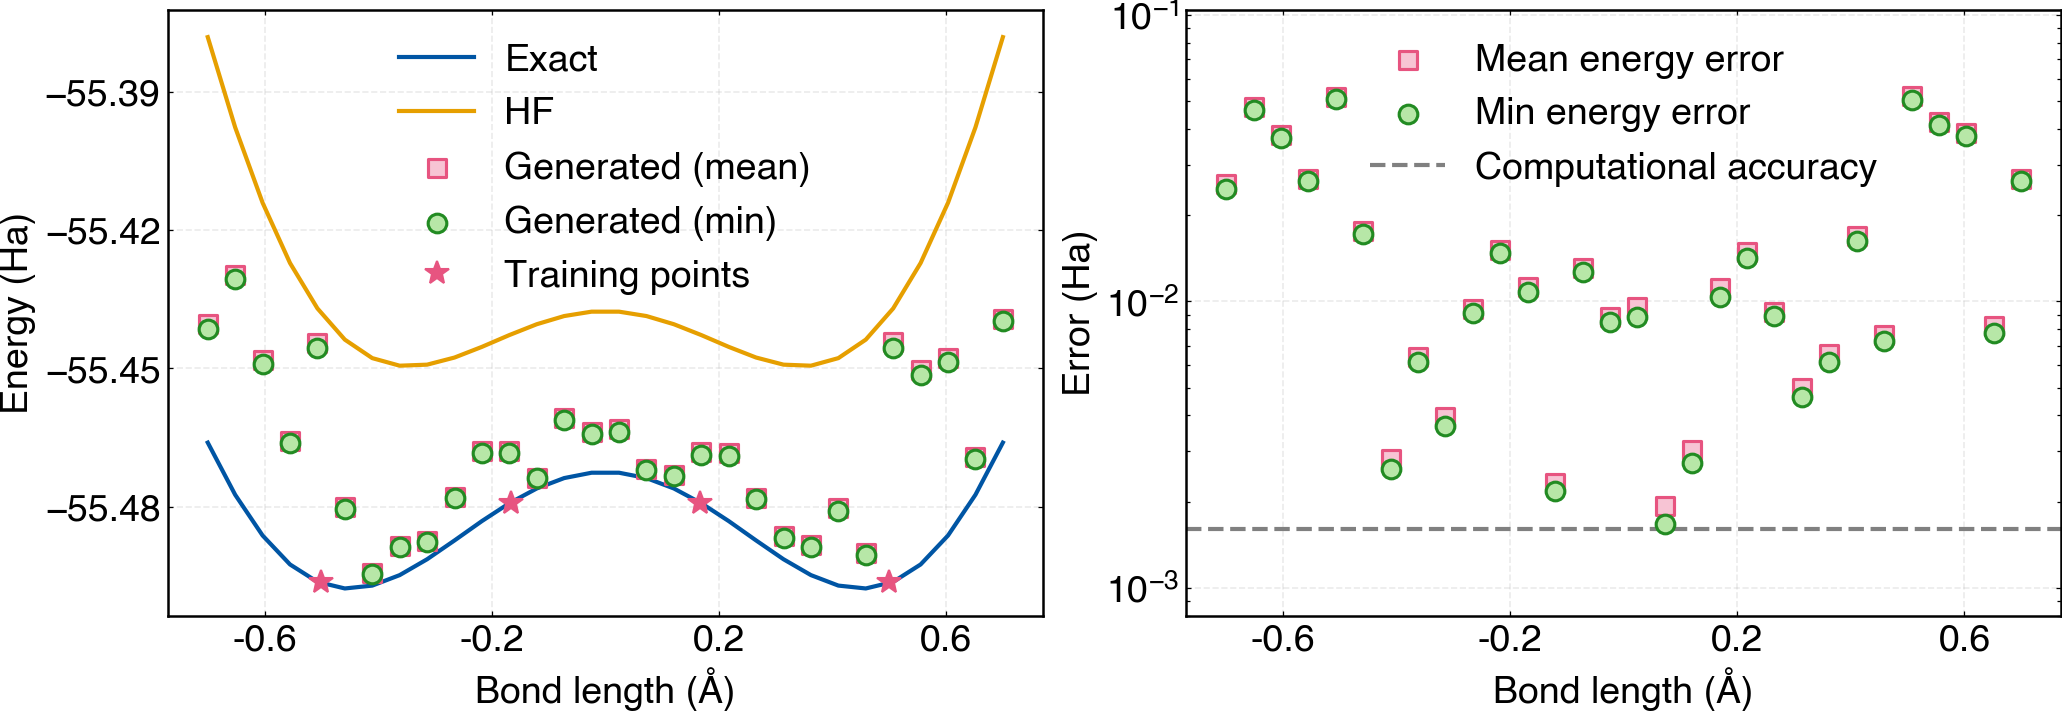

In [24]:
def plot_potential_energy_surface(pes_data, training_distances=None, save_path=None):
 
    bond_lengths = pes_data['bond_lengths']
    exact_energies = pes_data['exact_energies']
    generated_min_energies = pes_data['generated_min_energies']
    generated_mean_energies = pes_data['generated_mean_energies']
    errors = pes_data['errors']
    hf_energies = pes_data['hf_energies']

    mean_errors = [generated_mean - exact for generated_mean, exact in zip(generated_mean_energies, exact_energies)]
    min_errors = [error for error in errors]

    exact_color = '#0055A4'     
    hf_color = '#E69F00'        
    min_face = '#B7E7A7'         
    min_edge = '#228B22'        
    mean_face = '#F7C4D4'       
    mean_edge = '#E75480'      
    train_color = '#E75480'     

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    ax = axes[0]
    ax.plot(bond_lengths, exact_energies, '-', color=exact_color, label='Exact', linewidth=2)
    ax.plot(bond_lengths, hf_energies, '-', color=hf_color, label='HF', linewidth=2)
    ax.scatter(bond_lengths, generated_mean_energies, label='Generated (mean)',
               marker='s', s=80, facecolor=mean_face, edgecolor=mean_edge, linewidth=1.5, zorder=3)
    ax.scatter(bond_lengths, generated_min_energies, label='Generated (min)',
               marker='o', s=80, facecolor=min_face, edgecolor=min_edge, linewidth=1.5, zorder=4)

    if training_distances is not None:
        training_exact_y = []
        for train_dist in training_distances:
            closest_idx = np.argmin([abs(bl - train_dist) for bl in bond_lengths])
            training_exact_y.append(exact_energies[closest_idx])
        
        ax.plot(training_distances, training_exact_y, marker='*', linestyle='None', 
                color=train_color, markersize=12, label='Training points', zorder=10)

    ax.set_xlabel('Bond length (Å)')
    ax.set_ylabel('Energy (Ha)')
    ax.legend(frameon=False)
    ax.set_xticks([-0.6,-0.2,  0.2, 0.6 ])
    ax.set_xticklabels(['-0.6', '-0.2', '0.2', '0.6'])
    ax.yaxis.set_major_locator(MaxNLocator(nbins=5))

    for spine in ax.spines.values():
        spine.set_visible(True)

    ax2 = axes[1]
    ax2.scatter(bond_lengths, mean_errors, label='Mean energy error', 
                marker='s', s=80, facecolor=mean_face, edgecolor=mean_edge, linewidth=1.5, zorder=3)
    ax2.scatter(bond_lengths, min_errors, label='Min energy error', 
                marker='o', s=80, facecolor=min_face, edgecolor=min_edge, linewidth=1.5, zorder=4)
    
    ax2.axhline(y=1.6e-3, color='gray', linestyle='--', linewidth=2, label='Computational accuracy')
    
    ax2.set_xlabel('Bond length (Å)')
    ax2.set_ylabel('Error (Ha)')
    ax2.set_yscale('log')
    ax2.legend(frameon=False, )
    ax2.set_xticks([-0.6,-0.2,  0.2, 0.6 ])
    ax2.set_xticklabels(['-0.6', '-0.2', '0.2', '0.6'])
    ax2.margins(y=0.2)

    for spine in ax2.spines.values():
        spine.set_visible(True)

    plt.tight_layout()
    #plt.savefig("reproduced_nh3_pes.pdf", dpi=1200, bbox_inches='tight')
    plt.show()
     
        

pes_data = load_pes_data('a_store_data/flow_vqe_m_nh3_results/pes_data.json')

training_distances = np.linspace(-0.5, 0.5, 4)
print(f"Training distances: {training_distances}")

plot_potential_energy_surface(pes_data, training_distances, 'reproduced_nh3_pes.pdf')

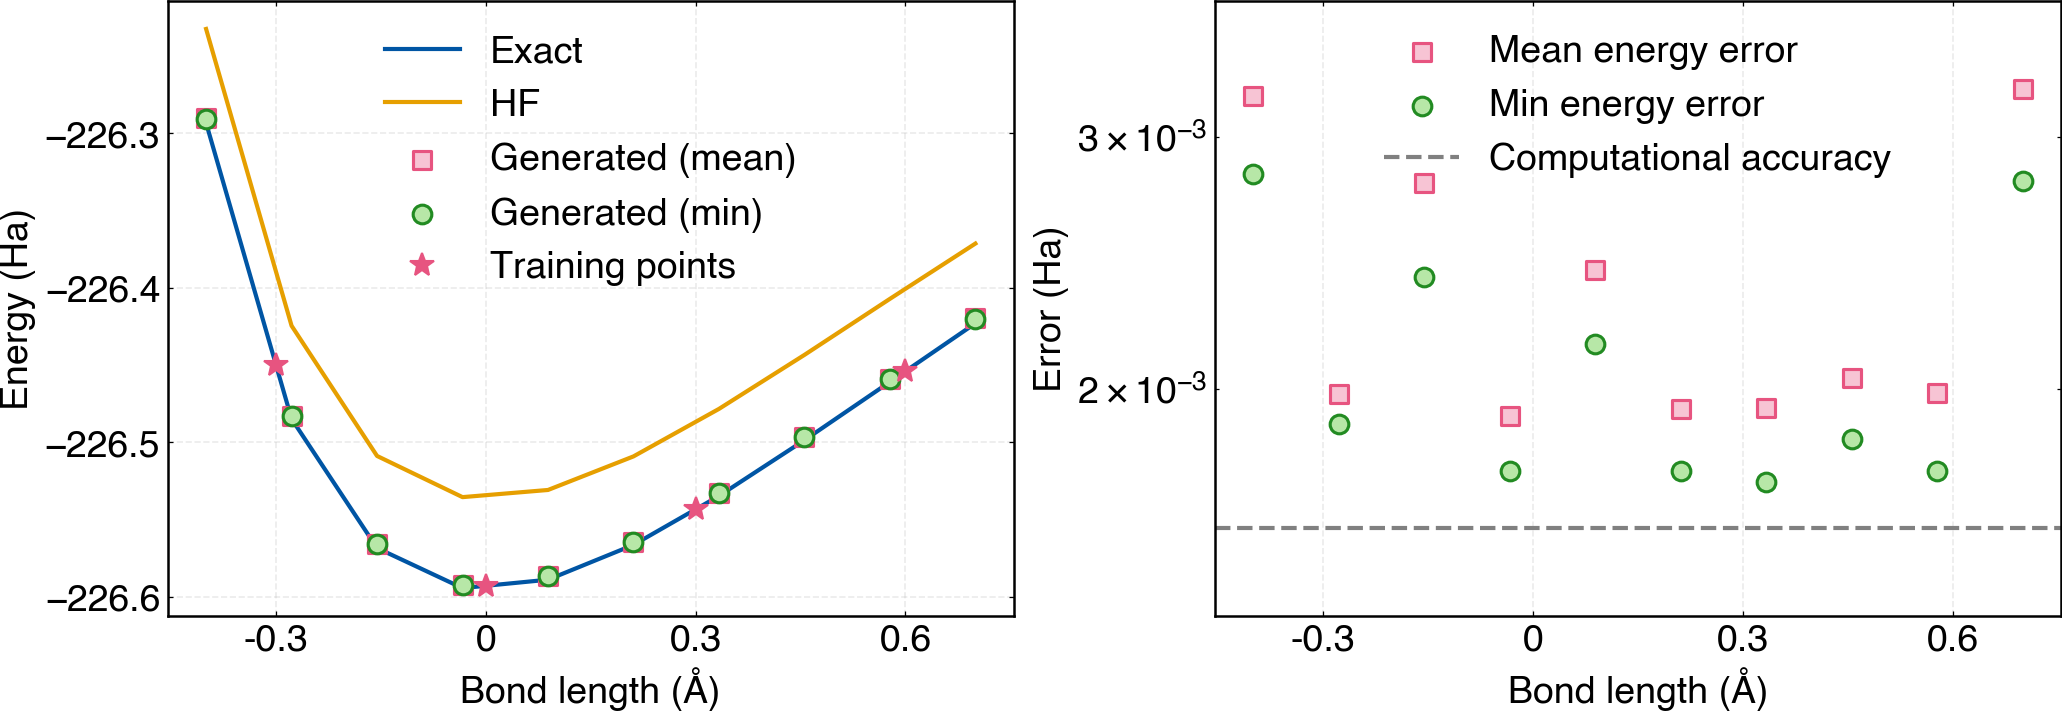

In [25]:
 

def plot_potential_energy_surface(pes_data, training_distances=None, ):
   

    bond_lengths = np.array(pes_data['bond_lengths'])
    exact_energies = np.array(pes_data['exact_energies'])
    hf_energies = np.array(pes_data['hf_energies'])
    generated_mean_energies = np.array(pes_data['generated_mean_energies'])
    generated_min_energies = np.array(pes_data['generated_min_energies'])
    errors = np.array(pes_data['errors'])

    mean_errors = generated_mean_energies - exact_energies
    min_errors = errors

    exact_color = '#0055A4'
    hf_color = '#E69F00'
    min_face = '#B7E7A7'
    min_edge = '#228B22'
    mean_face = '#F7C4D4'
    mean_edge = '#E75480'
    train_color = '#E75480'

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    ax = axes[0]
    ax.plot(bond_lengths, exact_energies, '-', color=exact_color, label='Exact', linewidth=2)
    ax.plot(bond_lengths, hf_energies,    '-', color=hf_color,   label='HF',    linewidth=2)
    ax.scatter(bond_lengths, generated_mean_energies,
               marker='s', s=80, facecolor=mean_face, edgecolor=mean_edge,
               linewidth=1.5, label='Generated (mean)', zorder=3)
    ax.scatter(bond_lengths, generated_min_energies,
               marker='o', s=80, facecolor=min_face, edgecolor=min_edge,
               linewidth=1.5, label='Generated (min)', zorder=4)

    if training_distances is not None:
        training_distances = np.array(training_distances)
        training_exact_y = np.interp(training_distances,
                                     bond_lengths,
                                     exact_energies)
        ax.plot(training_distances, training_exact_y,
                marker='*', linestyle='None',
                color=train_color, markersize=12,
                label='Training points', zorder=10)

    ax.set_xlabel('Bond length (Å)')
    ax.set_ylabel('Energy (Ha)')
    ax.legend(frameon=False)
    ax.set_xticks([-0.3, 0.0, 0.3, 0.6])
    ax.set_xticklabels(['-0.3', '0', '0.3', '0.6'])
    ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
 
    for spine in ax.spines.values():
        spine.set_visible(True)

    ax2 = axes[1]
    ax2.scatter(bond_lengths, mean_errors,
                marker='s', s=80, facecolor=mean_face, edgecolor=mean_edge,
                linewidth=1.5, label='Mean energy error', zorder=3)
    ax2.scatter(bond_lengths, min_errors,
                marker='o', s=80, facecolor=min_face, edgecolor=min_edge,
                linewidth=1.5, label='Min energy error', zorder=4)
    ax2.axhline(y=1.6e-3, color='gray', linestyle='--', linewidth=2,
                label='Computational accuracy')

    ax2.set_xlabel('Bond length (Å)')
    ax2.set_ylabel('Error (Ha)')
    ax2.set_yscale('log')
    ax2.legend(frameon=False)
    ax2.set_xticks([-0.3, 0.0, 0.3, 0.6])
    ax2.set_xticklabels(['-0.3', '0', '0.3', '0.6'])

    ax2.margins(y=0.2)
    for spine in ax2.spines.values():
        spine.set_visible(True)

    plt.tight_layout()
    #plt.savefig(reproduced_c6h6_pes.pdf, dpi=1200, bbox_inches='tight')
    plt.show()

if __name__ == "__main__":
    pes_data = load_pes_data('a_store_data/flow_vqe_m_c6h6_results/pes_data.json')
    training_distances = [-0.3, 0.0, 0.3, 0.6]
    plot_potential_energy_surface(
        pes_data,
        training_distances=training_distances, 
    )


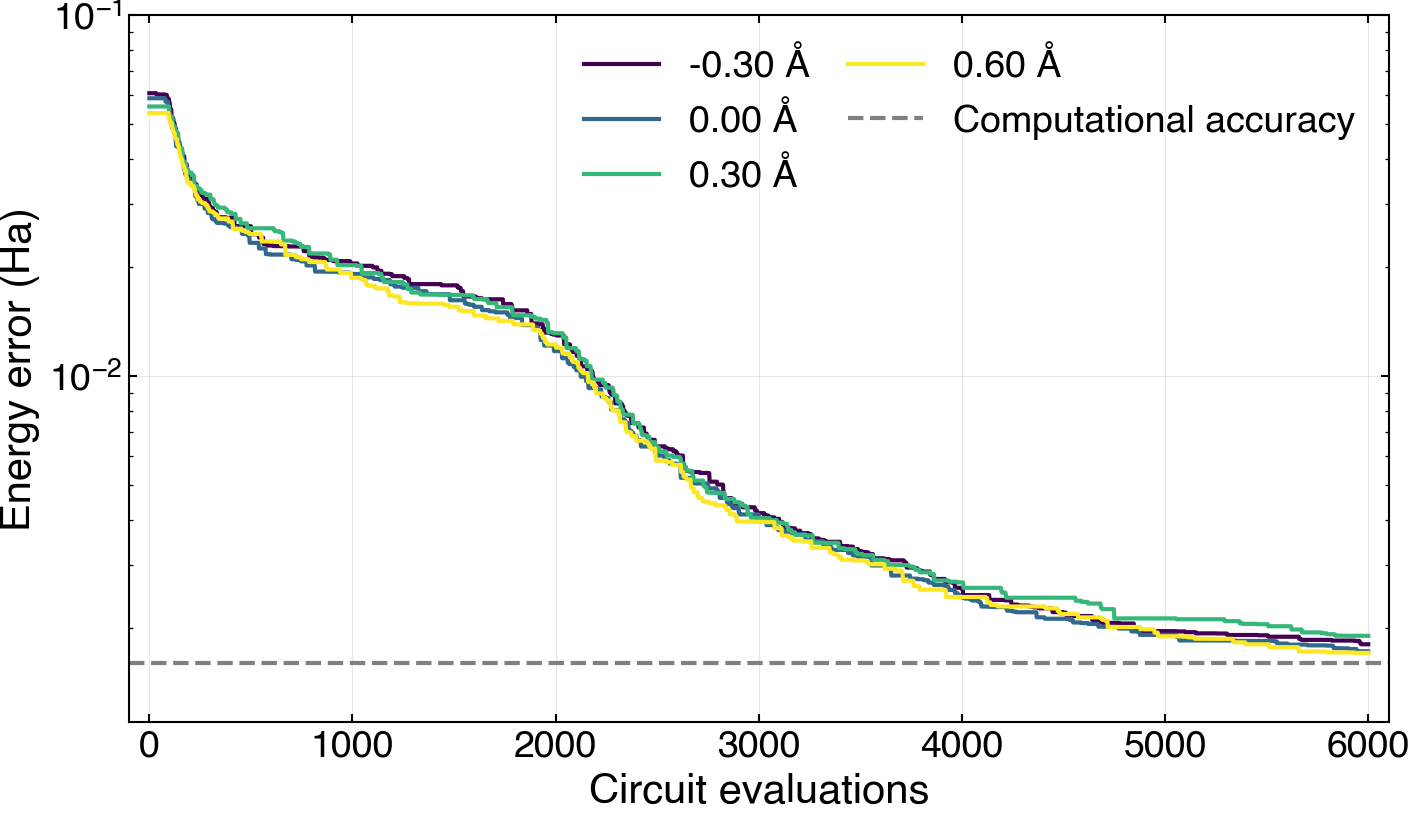

In [26]:
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['lines.linewidth'] = 2
     
def plot_curves(json_file): 
    with open(json_file, 'r') as f:
        data = json.load(f)
    
    if 'training_history' in data:
        training_history = data['training_history']
    else:
        training_history = data
     
    epochs = [item['epoch'] * 2 for item in training_history]
    errors_data = [item['errors'] for item in training_history]
    distances = sorted([float(d) for d in errors_data[0].keys()])
        
   
    fig, ax = plt.subplots(figsize=(10, 6))
   
    viridis = plt.cm.viridis
    colors = viridis(np.linspace(0, 1, len(distances)))
     
    for i, dist in enumerate(distances):
        errors = [item['errors'][str(dist)] for item in training_history]
        ax.plot(epochs, errors, 
               color=colors[i], 
               linewidth=2,
               label=f'{dist:.2f} Å')
 
    ax.axhline(y=1.6e-3, color='gray', linestyle='--', linewidth=2,
               label='Computational accuracy')
    
 
    ax.set_xlabel('Circuit evaluations', fontsize=20)
    ax.set_ylabel('Energy error (Ha)', fontsize=20)
    ax.set_yscale('log')
    ax.set_xlim(0, 5000)
    ax.set_ylim(1e-4, 1)
    ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
    
 
    legend = ax.legend(loc='upper right', 
                      frameon=False,  
                      fancybox=False, 
                      shadow=False, 
                      fontsize=18, 
                      framealpha=1.0,
                      ncol=2,   
                      columnspacing=1.0,   
                      handlelength=2.0)   
 
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    for spine in ax.spines.values():
        spine.set_linewidth(1)
    
    ax.tick_params(axis='both', which='major', labelsize=18, width=1, length=4)
    ax.set_yticks([1e-4, 1e-3, 1e-2, 1e-1])
    #ax.xaxis.set_major_locator(MaxNLocator(nbins=5))

    ax.set_xlim(-100, 6100)
    ax.set_ylim(1.1e-3, 1e-1)
  
    pdf_name = "C6H6_m_learning_curves.pdf"
    #plt.savefig(pdf_name, dpi=1200, bbox_inches='tight',  pad_inches=0.1, facecolor='white')
 
     
    plt.tight_layout()
    plt.show()
    
    return fig, ax


if __name__ == "__main__":
    json_file = 'a_store_data/flow_vqe_m_c6h6_results/training_history.json'
    
    plot_curves(json_file) 

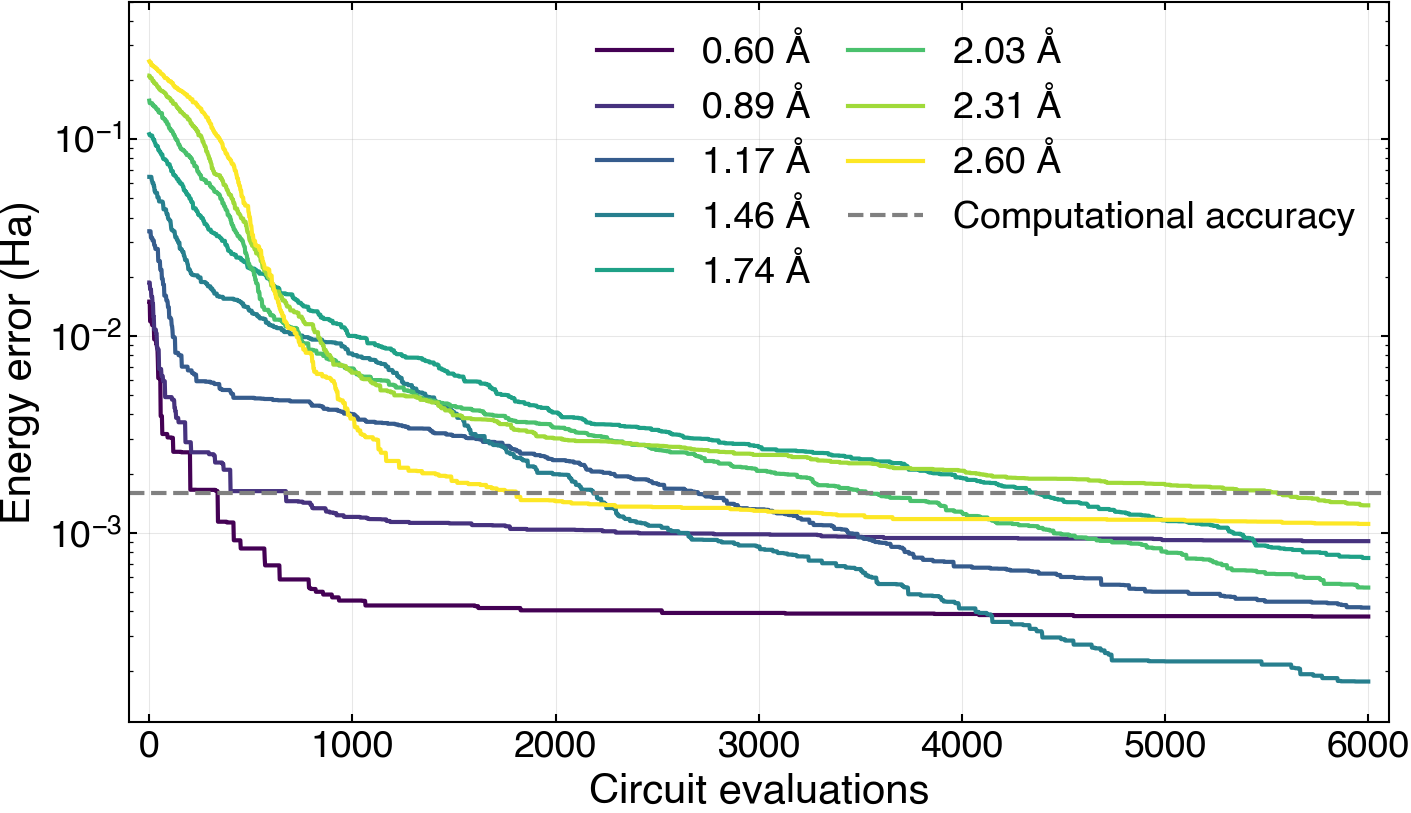

In [27]:
 

def plot_individual_models_curves(base_path):
  
    distance_dirs = glob.glob(os.path.join(base_path, "distance_*"))
    distance_dirs.sort(key=lambda x: float(x.split("distance_")[1]))
  
    fig, ax = plt.subplots(figsize=(10, 6))
     
    viridis = plt.cm.viridis
    colors = viridis(np.linspace(0, 1, len(distance_dirs)))
     
    for i, distance_dir in enumerate(distance_dirs):
        distance = float(os.path.basename(distance_dir).split("distance_")[1])
        
        history_file = os.path.join(distance_dir, "training_history.json")
     
            
        with open(history_file, 'r') as f:
            training_history = json.load(f)
        
        epochs = [item['epoch'] * 2 for item in training_history]
        errors = [item['error'] for item in training_history]
        
        ax.plot(epochs, errors, 
               color=colors[i], 
               linewidth=2,
               label=f'{distance:.2f} Å')
        
    
    ax.axhline(y=1.6e-3, color='gray', linestyle='--', linewidth=2,
               label='Computational accuracy')
    
    ax.set_xlabel('Circuit evaluations', fontsize=20)
    ax.set_ylabel('Energy error (Ha)', fontsize=20)
    ax.set_yscale('log')
    ax.set_xlim(0, 5000)
    ax.set_ylim(1e-4, 1)
    ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
    
    legend = ax.legend(loc='upper right', 
                      frameon=False,  
                      fancybox=False, 
                      shadow=False, 
                      fontsize=18, 
                      framealpha=1.0,
                      ncol=2,  
                      columnspacing=1.0,  
                      handlelength=2.0) 
    
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    for spine in ax.spines.values():
        spine.set_linewidth(1)
    
    ax.tick_params(axis='both', which='major', labelsize=18, width=1, length=4)
    ax.set_yticks([1e-4, 1e-3, 1e-2, 1e-1])
    
    ax.set_xlim(-100, 6100)
    ax.set_ylim(1.1e-4, 0.5e0)

    pdf_name = "H4_individual_models_learning_curves.pdf"
    #plt.savefig(pdf_name, dpi=1200, bbox_inches='tight', pad_inches=0.1, facecolor='white')
    
    
    plt.tight_layout()
    plt.show()
    
    return fig, ax

 
if __name__ == "__main__": 
    base_path = 'a_store_data/flow_vqe_s_optimization/h4_experiment/individual_models'
     
    plot_individual_models_curves(base_path)
      